# Google Colab Setup

Auto sync for editing python script file in real time

In [ ]:
%load_ext autoreload
%autoreload 2

Google Drive Mount

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


Setting the directory path

In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "EECS_595_NLP/Project"

In [ ]:
# import os
# import sys

# assert sys.version_info[0] == 3
# assert sys.version_info[1] >= 5

# GOOGLE_DRIVE_PATH = os.path.join("drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# sys.path.append(GOOGLE_DRIVE_PATH)

# print(os.listdir(GOOGLE_DRIVE_PATH))

# assert "Embedding.ipynb" in os.listdir(GOOGLE_DRIVE_PATH), "<Warning>: Embedding.ipynb not found."
# assert "Embedding.py" in os.listdir(
#     GOOGLE_DRIVE_PATH
# ), "<Warning>: Embedding not found."

Change Current Directory Path

In [ ]:
%cd drive/My Drive/EECS_595_NLP/Project

/content/drive/My Drive/EECS_595_NLP/Project


In [ ]:
!ls

 Embedding.ipynb
 EmoTag-Vectors-620d
 en_2013_01_01.pkl
 en-ids.tsv
 glove
 glove.6B.200d.txt
 glove.twitter.27B.200d.txt
 LstmSenti.py
 model_lstmsenti_001.torch
 model_lstmsenti_emotag001.torch
 model_lstmsenti_Emotag_new.torch
 model_lstmsenti_Emotag.torch
 model_lstmsenti_glovetwit_new.torch
 model_lstmsenti_glovtwit.torch
 model_lstmsenti_gltwit001.torch
 model_lstmsenti_new.torch
 model_lstmsenti.torch
 model_test.torch
'Nov 6 note.txt'
 parquet
 rehydrate_2013_01_multiprocessing.py
 rehydrated_tweets
 rehydrated_tweets_parquet
 RNNPOS_EMOTAG.ipynb
 Sentiment_Classification_LSTM_Dec05.ipynb
 Sentiment_Classification_LSTM.ipynb


# Loading data

pyarrow.parquet.read_table() used for reading parquet file

In [ ]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import os
Data = pq.read_table('parquet/2013/01/en_2013_01_01.parquet')

.to_pandas() used for convert data into pandas format

In [ ]:
Data.to_pandas()

,tweet_date,tweet_id,sentiment,emojis,tweet_day,tweet_month,tweet_year,tweet_year_month,tweet_text
0,2013-01-01,286003826803240960,1,✌,1,1,2013,2013-01,“@BritneyStyles1D: @Harry_Styles TAKE SOME FUC...
1,2013-01-01,286003826811625472,0,😒,1,1,2013,2013-01,Okaay shes getting anoying now ! 😒
2,2013-01-01,286003826811625472,0,😒,1,1,2013,2013-01,"@nurulintan16 hhe iye , sory yaaw."
4,2013-01-01,286003830993326080,1,😘,1,1,2013,2013-01,Happy effing New Years!😘 #2013 #kissingmyself...
5,2013-01-01,286003830993326080,1,😘,1,1,2013,2013-01,@Chiquis626 Por un 2013 juntos :)) Teamoo Prin...
...,...,...,...,...,...,...,...,...,...
105211,2013-01-01,286366206284427264,1,😊,1,1,2013,2013-01,@silvia0920 私スゲーデカイ化粧品入れる箱があるよ！机の半分は箱が占領してる…苦笑
105212,2013-01-01,286366206284427264,1,😊,1,1,2013,2013-01,@thaijaaaa yayyy 👏😊
105213,2013-01-01,286366206292811776,1,;),1,1,2013,2013-01,@reecemastin @RhiannonMFish photos of wet n wi...
105214,2013-01-01,286366210487107584,1,✌,1,1,2013,2013-01,Me parece que no se van a dar cuenta que estab...


Function **Load_parquet(folder_path)**

In [ ]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import os

def Load_parquet(folder_path):
  #folder_path: folder contains parquet files ex) "parquet/2013/1"
  if not os.path.exists(folder_path):
    print("Path doesn't exist")
    return 
  
  for idx, filename in enumerate(os.listdir(folder_path)):
    Data = pq.read_table(folder_path + "/" + filename)
    Data = Data.to_pandas()
    if idx >= 1:
      break
    if idx == 0:
      Full_DATA = Data
    else:
      Full_DATA = pd.concat([Full_DATA, Data], ignore_index=True)

  return Full_DATA
  

Read first 9 files ( still uploading other files ..) look at if statment in the function (idx >=9)


In [ ]:
Full_Data = Load_parquet("parquet/2013/01")

In [ ]:
Full_Data

,tweet_date,tweet_id,sentiment,emojis,tweet_day,tweet_month,tweet_year,tweet_year_month,tweet_text
0,2013-01-29,296150691238518784,1,:),29,1,2013,2013-01,"@ilove_1D143 :) thanks, do you not use them be..."
2,2013-01-29,296150699622952960,0,":(,:(",29,1,2013,2013-01,fresh part that he assumed. The stage lost a f...
3,2013-01-29,296150699622952960,0,":(,:(",29,1,2013,2013-01,@BrettGriffith6 Yay :( I wish I could tho... 
5,2013-01-29,296150703813050368,1,:),29,1,2013,2013-01,@babyqueen700 Kindly follow back :)
6,2013-01-29,296150703829827584,0,😬,29,1,2013,2013-01,@turtle_tiff goodnight 😏😬 and Thankyou . You t...
...,...,...,...,...,...,...,...,...,...
128889,2013-01-29,296513062331109376,0,D;,29,1,2013,2013-01,誰か今日19時からSAやりませんか。
128890,2013-01-29,296513062331109376,0,D;,29,1,2013,2013-01,RT @athkar_ad3ih: اذكار_الصباح ♥\n\n\n\n\n ht...
128891,2013-01-29,296513062331109376,0,D;,29,1,2013,2013-01,i don't want to represent it in front of my cl...
128892,2013-01-29,296513070719713280,1,:),29,1,2013,2013-01,RT “@itssamaris: I have an exessive amount of ...


In [ ]:
sum(Full_Data['sentiment'] == 0)

32291

In [ ]:
sum(Full_Data['sentiment'] == 1)

62451

#Preprocessing

**Get_UNKA** function do **Calculate Frequencey of words + Replace unfreqent word as UNKA**

**Create_Vocab** function do **Get Vocabulary of training_dataset**

**Preprocess** function do **Shuffle + split sentence + split dataset**

In [ ]:
import random
import argparse
import os
import pickle
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np
import pandas as pd

def create_emb_layer(weight_mat, device=None):
    weight_mat = torch.from_numpy(weight_mat)
    if device:
        weight_mat.to(device)
    num_embeddings, embedding_dim = weight_mat.size()
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': weight_mat})
    emb_layer.weight.requires_grad = False
    return emb_layer, embedding_dim

def Get_UNKA(words_by_sentence, frequency=2):
  #frequency : standard for replace word as UNKA
  word_freq = {}
  for sentence in words_by_sentence:
    for word in sentence:
      if (word in word_freq):
        word_freq[word] +=1
      else:
        word_freq[word] = 1
  
  unka_set = set()
  for sentence in words_by_sentence:
        for word in sentence:
            if (word_freq[word] <= frequency):
                unka_set.add(word)
  for idx, sentence in enumerate(words_by_sentence):
      words_by_sentence[idx] = ["UNKA" if word in unka_set else word for word in sentence]
  return words_by_sentence

def Create_Vocab(words_by_sentence):
  vocab_words_set = set()
  for sentence in words_by_sentence:
    vocab_words_set.update(set(sentence))
  vocab_word_list = sorted(vocab_words_set)
  vocab_word_list.insert(0, "<PAD>") # insert <PAD> at index 0 for padded data
  vocab_dict = dict(zip(vocab_word_list, range(len(vocab_word_list))))
  
  return vocab_dict, vocab_word_list

def Tokenize_with_Vocab(words_by_sentence, vocab_dict):
    for sentence in words_by_sentence:
        for i in range(len(sentence)):
            if vocab_dict.get(sentence[i]) == None:
              sentence[i] = vocab_dict.get("UNKA")
            else:
              sentence[i] = vocab_dict.get(sentence[i])



def Creat_Batch(words_by_sentence, Label,train_batch):
  n_sentences = len(words_by_sentence)
  if ((n_sentences % train_batch) == 0):
      n_batches = n_sentences / train_batch
  else:
      n_batches = (n_sentences // train_batch) # if left one is less than bathsize, drop it+ 1
  list_of_word_label_batches = [] # list of lists of lists
  for i in range(n_batches):
      word_label_batche = []
      for j in range(train_batch):
          sentence_idx = i * train_batch + j
          if sentence_idx < n_sentences:
              word_label_batche.append((words_by_sentence[sentence_idx], Label[sentence_idx]))
      list_of_word_label_batches.append(word_label_batche)
  return list_of_word_label_batches

def Padding_and_zip_with_label(words_by_sentence, Label):
  sentence_lengths = [len(sentence) for sentence in words_by_sentence]
  max_sentence_len = max(sentence_lengths)
  padded_word_mat = np.zeros((len(words_by_sentence), max_sentence_len))
  padded_label_mat = np.zeros(len(words_by_sentence))
  for i in range(len(words_by_sentence)):
      word_seq = words_by_sentence[i]
      padded_word_mat[i, 0:sentence_lengths[i]] = word_seq[:sentence_lengths[i]]
      label = Label[i]
      padded_label_mat[i] = label

  return (padded_word_mat, padded_label_mat), sentence_lengths

def Train_Batch_Padding(Train_batches, train_batch):
  list_of_lens_in_batch = []
  for i in range(len(Train_batches)):
      sentence_lengths = [len(data[0]) for data in Train_batches[i]]
      list_of_lens_in_batch.append(sentence_lengths)
      max_sentence_len = max(sentence_lengths)
      padded_word_batch = np.zeros((train_batch, max_sentence_len), dtype=int)
      padded_label_batch = np.zeros(train_batch, dtype=np.int)
      for j, sentence_len in enumerate(sentence_lengths):
          word_seq = Train_batches[i][j][0]
          padded_word_batch[j, 0:sentence_len] = word_seq[:sentence_len]
          label = Train_batches[i][j][1]
          padded_label_batch[j] = label
      Train_batches[i] = (padded_word_batch, padded_label_batch)
  return Train_batches, list_of_lens_in_batch

def Create_weightmat(pre_trained_embedding_file, vocab_word_list):
  if pre_trained_embedding_file == 'glove200d':
      # get glove embeddings from file and store in dict
      # "glove.6B/glove.6B.200d.txt"
      embedding_file = "glove.6B.200d.txt"
      Loaded_Emb_dict = {}
      with open(embedding_file) as e:
          x = e.readlines()
          for sentence in tqdm(x):
              embedding_list = sentence.split()
              target_word = embedding_list[0]
              embeddings = embedding_list[1:]
              embeddings = [float(val) for val in embeddings]
              Loaded_Emb_dict[target_word] = embeddings

  elif pre_trained_embedding_file == 'glovetwit200d':
      # get glove embeddings from file and store in dict
      # "glove.twitter.27B.200d.txt"
      embedding_file = "glove.twitter.27B.200d.txt"
      Loaded_Emb_dict = {}
      with open(embedding_file) as e:
          x = e.readlines()
          for sentence in tqdm(x):
              embedding_list = sentence.split()
              target_word = embedding_list[0]
              embeddings = embedding_list[1:]
              embeddings = [float(val) for val in embeddings]
              Loaded_Emb_dict[target_word] = embeddings
  
  elif pre_trained_embedding_file == 'Emotag':
      # get EmoTag embbeddings from tile and stor in dict
      # 'EmoTag-Vectors-620d/emotag-vectors.csv'
      embedding_file = 'EmoTag-Vectors-620d/emotag-vectors.csv'
      Loaded_Emb_dict = {}
      with open(embedding_file, 'r') as e:
          x = e.readlines()
          for sentence in tqdm(x):
              embedding_list = sentence.split()
              embedding_list[-1] = embedding_list[-1].replace('\n','')
              target_word = embedding_list[0]
              embeddings = embedding_list[1:]
              embeddings = [float(val) for val in embeddings]
              Loaded_Emb_dict[target_word] = embeddings
  else:
      print("wrong emb file name chosse one name between 'glove200d', 'glovetwit200d', 'Emotag'")

  mat_len = len(vocab_word_list)
  embedding_dim = len(embedding_list) - 1
  print(f"Embedding dimension : {embedding_dim}")

  weight_mat = np.zeros((mat_len, embedding_dim))
  for i, word in tqdm(enumerate(vocab_word_list)):
      if (i > 0): # leave the 0th row as 0s for <PAD> embedding
          try:
              weight_mat[i] = Loaded_Emb_dict[word]
          except KeyError:
              # use random values from a normal dist for words not in glove
              weight_mat[i] = np.random.normal(scale=0.6, size=(embedding_dim,))
  return weight_mat

def Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file='glove200d'):
  # Full_Data : Concatenated pandas data from parquet files
  # test_ratio : ratio of test set
  # evaluation_ratio : ratio of eval set
  random.seed(seed)
  Text = Full_Data['tweet_text'].to_list()
  random.shuffle(Text)  
  Label = Full_Data['sentiment'].to_list()
  random.shuffle(Label)

  N = len(Text)
  test_len = round(N * test_ratio)
  eval_len = round(N * evaluation_ratio)
  train_len = N - test_len - eval_len

  words_by_sentence = [sentence.split() for sentence in Text]
  words_by_sentence[:train_len] = Get_UNKA(words_by_sentence[:train_len])
  vocab_dict, vocab_word_list = Create_Vocab(words_by_sentence[:train_len])
  Tokenize_with_Vocab(words_by_sentence, vocab_dict)
  Train_batches = Creat_Batch(words_by_sentence[:train_len], Label[:train_len], train_batch)

  weight_mat = Create_weightmat(pre_trained_embedding_file, vocab_word_list)

  
  Train_set, list_of_lens_in_batch = Train_Batch_Padding(Train_batches, train_batch)
  Eval_set, Eval_len = Padding_and_zip_with_label(words_by_sentence[train_len: train_len+eval_len], Label[train_len: train_len+eval_len])
  Test_set, Test_len = Padding_and_zip_with_label(words_by_sentence[train_len+eval_len: N], Label[train_len+eval_len: N])

  return Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len

Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file='glove200d')
  

100%|██████████| 400000/400000 [00:21<00:00, 18832.52it/s]


Embedding dimension : 200


16700it [00:00, 72496.94it/s]
<ipython-input-24-2db8c813ab7b>:97: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


(numpy array for tokens, numpy array for the labels)

In [ ]:
len(Train_set)

18264

In [ ]:
len(Train_set[0])

2

In [ ]:
len(Train_set[-1][0].shape)

2

In [ ]:
len(Test_set)

2

In [ ]:
Train_set[0][0].shape

(32, 29)

In [ ]:
len(Eval_set[0])
Eval_set[0].shape

(9474, 37)

In [ ]:
len(Eval_set[0])

9474

RNN model class

In [ ]:
BATCH_SIZE = 100
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)

class RNNSentiment(nn.Module):
    def __init__(self, hidden_dim, target_size, weight_mat):
        super(RNNSentiment, self).__init__()
        ############################################
        # TODO: Add pytorch cuda device to use gpu #
        ############################################
        self.cuda0 = torch.device('cuda:0')
        self.target_size = target_size
        ############################################
        # TODO END                                 #
        ############################################
        self.hidden_dim = hidden_dim
        self.embedding, embedding_dim = create_emb_layer(weight_mat, self.cuda0)
        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.dropout = nn.Dropout(p=0.1)
        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, target_size)
        self.softmax = nn.Softmax(dim=-1)
        


    def forward(self, sentence, lens_in_batch):
        sentence = torch.LongTensor(sentence)
        # print('sentence shape')
        # print(sentence.shape)
        ############################################
        # TODO: Add pytorch cuda device to use gpu #
        ############################################
        sentence.to(self.cuda0)
        ############################################
        # TODO END                                 #
        ############################################
        # print('embedding shape')
        # print(self.embedding(sentence).shape)
        sentence = torch.nn.utils.rnn.pack_padded_sequence(
            self.embedding(sentence),
            lens_in_batch,
            batch_first = True,
            enforce_sorted = False
        )
        
        lstm_out, _ = self.lstm(sentence)
        lstm_out, _ = torch.nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)
        label_space = self.dropout(lstm_out)
        # print('after lstm')
        # print(label_space.shape)
        label_space = label_space.view(label_space.shape[0], -1)
        # print('after view')
        # print(label_space.shape)
        fc1 = nn.Linear(label_space.shape[-1], self.target_size)
        label_space = fc1(label_space)#self.hidden2tag(label_space)
        # print('after linear')
        # print(label_space.shape)
      
        label_scores = self.softmax(label_space)
        return label_scores

Train

In [ ]:
def train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate = 0.01, n_epochs = 30):
  cuda0 = torch.device('cuda:0') # .to(cuda0)
  # train model
  
  model = RNNSentiment(HIDDEN_DIM, TAGSET_SIZE, weight_mat)
  criterion = torch.nn.CrossEntropyLoss(ignore_index=0)
  optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
  print('##############################')
  print('Train Model')
  print('##############################')
  
  for epoch in tqdm(range(n_epochs)):
      print(f'\nepoch: {epoch+1}')
      
      for batch_no in tqdm(range(len(Train_set))):

          padded_word_batch = Train_set[batch_no][0]
          padded_label_batch = Train_set[batch_no][1]
          lens_in_batch = list_of_lens_in_batch[batch_no]
          optimiser.zero_grad()
          predictions = model(padded_word_batch, lens_in_batch)
          # print(predictions.shape)
          # print(padded_label_batch.shape)
          predictions = predictions.view(-1, predictions.shape[-1])
          padded_label_batch = torch.LongTensor(padded_label_batch).view(-1)
          ############################################
          # TODO: Add pytorch cuda device to use gpu #
          ############################################
          padded_label_batch.to(cuda0)
          ############################################
          # TODO END                                 #
          ############################################
          loss = criterion(predictions, padded_label_batch)
          loss.backward()
          optimiser.step()
      print("FINISHED EPOCH: " + str(epoch + 1))
      print(f'train_loss: {loss}')
      
      with torch.no_grad():
        # length = torch.tensor([len(Eval_set[0])], dtype=torch.int64)
        eval_pred = model(Eval_set[0], Eval_len)
        eval_pred = eval_pred.view(-1, eval_pred.shape[-1])
        labels = Eval_set[1]
        labels = torch.LongTensor(labels).view(-1)
        labels.to(cuda0)
        eval_loss = criterion(eval_pred, labels)
        print(f'\nEvaluation LOSS: {eval_loss}')
        eval_pred = torch.argmax(eval_pred, -1).cpu()
        score = accuracy_score(eval_pred, labels)
        print(f"Evaluation ACC: {100*score:6.2f}%")

  # Your code ends here

  return model

def test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file):
  cuda0 = torch.device('cuda:0')
  criterion = torch.nn.CrossEntropyLoss(ignore_index=0)
  with torch.no_grad():
      model = RNNSentiment(HIDDEN_DIM, TAGSET_SIZE, weight_mat)
      model.load_state_dict(torch.load(model_file))
      # length = torch.tensor([len(Eval_set[0])], dtype=torch.int64)
      test_pred = model(Test_set[0], Test_len)
      test_pred = test_pred.view(-1, test_pred.shape[-1])
      labels = Test_set[1]
      labels = torch.LongTensor(labels).view(-1)
      labels.to(cuda0)
      test_loss = criterion(test_pred, labels)
      print(f'\nTEST LOSS: {test_loss}')
      test_pred = torch.argmax(test_pred, -1).cpu()
      score = accuracy_score(test_pred, labels)
      print(f"TEST ACC: {100*score:6.2f}%")


In [ ]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import os
import random
import argparse
import os
import pickle
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

# Functions : Run this cell to define all functions we needed

In [ ]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import os
import random
import argparse
import os
import pickle
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)



def Load_parquet(folder_path, stopper=100):
  #folder_path: folder contains parquet files ex) "parquet/2013/1"
  if not os.path.exists(folder_path):
    print("Path doesn't exist")
    return 
  
  for idx, filename in enumerate(os.listdir(folder_path)):
    Data = pq.read_table(folder_path + "/" + filename)
    Data = Data.to_pandas()
    if idx >= stopper:
      break
    
    if idx == 0:
      Full_DATA = Data
    else:
      Full_DATA = pd.concat([Full_DATA, Data], ignore_index=True)

  return Full_DATA

def create_emb_layer(weight_mat, device=None):
    weight_mat = torch.from_numpy(weight_mat)
    if device:
        weight_mat.to(device)
    num_embeddings, embedding_dim = weight_mat.size()
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': weight_mat})
    emb_layer.weight.requires_grad = False
    return emb_layer, embedding_dim

def Get_UNKA(words_by_sentence, frequency=2):
  #frequency : standard for replace word as UNKA
  word_freq = {}
  for sentence in words_by_sentence:
    for word in sentence:
      if (word in word_freq):
        word_freq[word] +=1
      else:
        word_freq[word] = 1
  
  unka_set = set()
  for sentence in words_by_sentence:
        for word in sentence:
            if (word_freq[word] <= frequency):
                unka_set.add(word)
  for idx, sentence in enumerate(words_by_sentence):
      words_by_sentence[idx] = ["UNKA" if word in unka_set else word for word in sentence]
  return words_by_sentence

def Create_Vocab(words_by_sentence):
  vocab_words_set = set()
  for sentence in words_by_sentence:
    vocab_words_set.update(set(sentence))
  vocab_word_list = sorted(vocab_words_set)
  vocab_word_list.insert(0, "<PAD>") # insert <PAD> at index 0 for padded data
  vocab_dict = dict(zip(vocab_word_list, range(len(vocab_word_list))))
  
  return vocab_dict, vocab_word_list

def Tokenize_with_Vocab(words_by_sentence, vocab_dict):
    for sentence in words_by_sentence:
        for i in range(len(sentence)):
            if vocab_dict.get(sentence[i]) == None:
              sentence[i] = vocab_dict.get("UNKA")
            else:
              sentence[i] = vocab_dict.get(sentence[i])



def Creat_Batch(words_by_sentence, Label,train_batch):
  n_sentences = len(words_by_sentence)
  if ((n_sentences % train_batch) == 0):
      n_batches = n_sentences / train_batch
  else:
      n_batches = (n_sentences // train_batch) # if left one is less than bathsize, drop it+ 1
  list_of_word_label_batches = [] # list of lists of lists
  for i in range(n_batches):
      word_label_batche = []
      for j in range(train_batch):
          sentence_idx = i * train_batch + j
          if sentence_idx < n_sentences:
              word_label_batche.append((words_by_sentence[sentence_idx], Label[sentence_idx]))
      list_of_word_label_batches.append(word_label_batche)
  return list_of_word_label_batches

def Padding_and_zip_with_label(words_by_sentence, Label):
  sentence_lengths = [len(sentence) for sentence in words_by_sentence]
  max_sentence_len = max(sentence_lengths)
  padded_word_mat = np.zeros((len(words_by_sentence), max_sentence_len))
  padded_label_mat = np.zeros(len(words_by_sentence))
  for i in range(len(words_by_sentence)):
      word_seq = words_by_sentence[i]
      padded_word_mat[i, 0:sentence_lengths[i]] = word_seq[:sentence_lengths[i]]
      label = Label[i]
      padded_label_mat[i] = label

  return (padded_word_mat, padded_label_mat), sentence_lengths

def Train_Batch_Padding(Train_batches, train_batch):
  list_of_lens_in_batch = []
  for i in range(len(Train_batches)):
      sentence_lengths = [len(data[0]) for data in Train_batches[i]]
      list_of_lens_in_batch.append(sentence_lengths)
      max_sentence_len = max(sentence_lengths)
      padded_word_batch = np.zeros((train_batch, max_sentence_len), dtype=int)
      padded_label_batch = np.zeros(train_batch, dtype=np.int)
      for j, sentence_len in enumerate(sentence_lengths):
          word_seq = Train_batches[i][j][0]
          padded_word_batch[j, 0:sentence_len] = word_seq[:sentence_len]
          label = Train_batches[i][j][1]
          padded_label_batch[j] = label
      Train_batches[i] = (padded_word_batch, padded_label_batch)
  return Train_batches, list_of_lens_in_batch

def Create_weightmat(pre_trained_embedding_file, vocab_word_list):
  if pre_trained_embedding_file == 'glove200d':
      # get glove embeddings from file and store in dict
      # "glove.6B/glove.6B.200d.txt"
      embedding_file = "glove.6B.200d.txt"
      Loaded_Emb_dict = {}
      with open(embedding_file) as e:
          x = e.readlines()
          for sentence in tqdm(x):
              embedding_list = sentence.split()
              target_word = embedding_list[0]
              embeddings = embedding_list[1:]
              embeddings = [float(val) for val in embeddings]
              Loaded_Emb_dict[target_word] = embeddings

  elif pre_trained_embedding_file == 'glovetwit200d':
      # get glove embeddings from file and store in dict
      # "glove.twitter.27B.200d.txt"
      embedding_file = "glove.twitter.27B.200d.txt"
      Loaded_Emb_dict = {}
      with open(embedding_file) as e:
          x = e.readlines()
          for sentence in tqdm(x):
              embedding_list = sentence.split()
              target_word = embedding_list[0]
              embeddings = embedding_list[1:]
              embeddings = [float(val) for val in embeddings]
              Loaded_Emb_dict[target_word] = embeddings
  
  elif pre_trained_embedding_file == 'Emotag':
      # get EmoTag embbeddings from tile and stor in dict
      # 'EmoTag-Vectors-620d/emotag-vectors.csv'
      embedding_file = 'EmoTag-Vectors-620d/emotag-vectors.csv'
      Loaded_Emb_dict = {}
      with open(embedding_file, 'r') as e:
          x = e.readlines()
          for sentence in tqdm(x):
              embedding_list = sentence.split()
              embedding_list[-1] = embedding_list[-1].replace('\n','')
              target_word = embedding_list[0]
              embeddings = embedding_list[1:]
              embeddings = [float(val) for val in embeddings]
              Loaded_Emb_dict[target_word] = embeddings
  else:
      print("wrong emb file name chosse one name between 'glove200d', 'glovetwit200d', 'Emotag'")

  mat_len = len(vocab_word_list)
  embedding_dim = len(embedding_list) - 1
  print(f"Embedding dimension : {embedding_dim}")

  weight_mat = np.zeros((mat_len, embedding_dim))
  for i, word in tqdm(enumerate(vocab_word_list)):
      if (i > 0): # leave the 0th row as 0s for <PAD> embedding
          try:
              weight_mat[i] = Loaded_Emb_dict[word]
          except KeyError:
              # use random values from a normal dist for words not in glove
              weight_mat[i] = np.random.normal(scale=0.6, size=(embedding_dim,))
  return weight_mat

def Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file='glove200d'):
  # Full_Data : Concatenated pandas data from parquet files
  # test_ratio : ratio of test set
  # evaluation_ratio : ratio of eval set
  random.seed(seed)
  Text = Full_Data['tweet_text'].to_list()
  random.shuffle(Text)  
  Label = Full_Data['sentiment'].to_list()
  random.shuffle(Label)

  N = len(Text)
  test_len = round(N * test_ratio)
  eval_len = round(N * evaluation_ratio)
  train_len = N - test_len - eval_len

  words_by_sentence = [sentence.split() for sentence in Text]
  words_by_sentence[:train_len] = Get_UNKA(words_by_sentence[:train_len])
  vocab_dict, vocab_word_list = Create_Vocab(words_by_sentence[:train_len])
  Tokenize_with_Vocab(words_by_sentence, vocab_dict)
  Train_batches = Creat_Batch(words_by_sentence[:train_len], Label[:train_len], train_batch)

  weight_mat = Create_weightmat(pre_trained_embedding_file, vocab_word_list)

  
  Train_set, list_of_lens_in_batch = Train_Batch_Padding(Train_batches, train_batch)
  Eval_set, Eval_len = Padding_and_zip_with_label(words_by_sentence[train_len: train_len+eval_len], Label[train_len: train_len+eval_len])
  Test_set, Test_len = Padding_and_zip_with_label(words_by_sentence[train_len+eval_len: N], Label[train_len+eval_len: N])

  return Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len



class RNNSentiment(nn.Module):
    def __init__(self, hidden_dim, target_size, weight_mat):
        super(RNNSentiment, self).__init__()
        ############################################
        # TODO: Add pytorch cuda device to use gpu #
        ############################################
        self.cuda0 = torch.device('cuda:0')
        self.target_size = target_size
        ############################################
        # TODO END                                 #
        ############################################
        self.hidden_dim = hidden_dim
        self.embedding, embedding_dim = create_emb_layer(weight_mat, self.cuda0)
        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.dropout = nn.Dropout(p=0.1)
        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, target_size)
        self.softmax = nn.Softmax(dim=-1)
        


    def forward(self, sentence, lens_in_batch):
        sentence = torch.LongTensor(sentence)
        # print('sentence shape')
        # print(sentence.shape)
        ############################################
        # TODO: Add pytorch cuda device to use gpu #
        ############################################
        sentence.to(self.cuda0)
        ############################################
        # TODO END                                 #
        ############################################
        # print('embedding shape')
        # print(self.embedding(sentence).shape)
        sentence = torch.nn.utils.rnn.pack_padded_sequence(
            self.embedding(sentence),
            lens_in_batch,
            batch_first = True,
            enforce_sorted = False
        )
        
        lstm_out, _ = self.lstm(sentence)
        lstm_out, _ = torch.nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)
        label_space = self.dropout(lstm_out)
        # print('after lstm')
        # print(label_space.shape)
        label_space = label_space.view(label_space.shape[0], -1)
        # print('after view')
        # print(label_space.shape)
        fc1 = nn.Linear(label_space.shape[-1], self.target_size)
        label_space = fc1(label_space)#self.hidden2tag(label_space)
        # print('after linear')
        # print(label_space.shape)
      
        label_scores = self.softmax(label_space)
        return label_scores

def train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate = 0.01, n_epochs = 30):
  cuda0 = torch.device('cuda:0') # .to(cuda0)
  # train model
  
  model = RNNSentiment(HIDDEN_DIM, TAGSET_SIZE, weight_mat)
  criterion = torch.nn.CrossEntropyLoss(ignore_index=0)
  optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
  print('##############################')
  print('Train Model')
  print('##############################')
  
  for epoch in tqdm(range(n_epochs)):
      print(f'\nepoch: {epoch+1}')
      
      for batch_no in tqdm(range(len(Train_set))):

          padded_word_batch = Train_set[batch_no][0]
          padded_label_batch = Train_set[batch_no][1]
          lens_in_batch = list_of_lens_in_batch[batch_no]
          # if lens_in_batch <0:
          #   print(lens_in_batch, batch_no)
          optimiser.zero_grad()
          predictions = model(padded_word_batch, lens_in_batch)
          # print(predictions.shape)
          # print(padded_label_batch.shape)
          predictions = predictions.view(-1, predictions.shape[-1])
          padded_label_batch = torch.LongTensor(padded_label_batch).view(-1)
          ############################################
          # TODO: Add pytorch cuda device to use gpu #
          ############################################
          padded_label_batch.to(cuda0)
          ############################################
          # TODO END                                 #
          ############################################
          loss = criterion(predictions, padded_label_batch)
          loss.backward()
          optimiser.step()
      print("FINISHED EPOCH: " + str(epoch + 1))
      print(f'train_loss: {loss}')
      
      with torch.no_grad():
        # length = torch.tensor([len(Eval_set[0])], dtype=torch.int64)
        eval_pred = model(Eval_set[0], Eval_len)
        eval_pred = eval_pred.view(-1, eval_pred.shape[-1])
        labels = Eval_set[1]
        labels = torch.LongTensor(labels).view(-1)
        labels.to(cuda0)
        eval_loss = criterion(eval_pred, labels)
        print(f'\nEvaluation LOSS: {eval_loss}')
        eval_pred = torch.argmax(eval_pred, -1).cpu()
        score = accuracy_score(eval_pred, labels)
        print(f"Evaluation ACC: {100*score:6.2f}%")

  # Your code ends here

  return model

def test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file):
  cuda0 = torch.device('cuda:0')
  criterion = torch.nn.CrossEntropyLoss(ignore_index=0)
  with torch.no_grad():
      model = RNNSentiment(HIDDEN_DIM, TAGSET_SIZE, weight_mat)
      model.load_state_dict(torch.load(model_file))
      # length = torch.tensor([len(Eval_set[0])], dtype=torch.int64)
      test_pred = model(Test_set[0], Test_len)
      test_pred = test_pred.view(-1, test_pred.shape[-1])
      labels = Test_set[1]
      labels = torch.LongTensor(labels).view(-1)
      labels.to(cuda0)
      test_loss = criterion(test_pred, labels)
      print(f'\nTEST LOSS: {test_loss}')
      test_pred = torch.argmax(test_pred, -1).cpu()
      score = accuracy_score(test_pred, labels)
      recall = recall_score(test_pred, labels)
      precision = precision_score(test_pred, labels)
      f1 = f1_score(test_pred, labels)
      print(f"Recall: {100*recall}")
      print(f"Precision: {100*precision}")
      print(f"F1-Score: {100*f1}")
      print(f"TEST ACC: {100*score:6.2f}%")
  

# Experiment lr=0.01 batch 32

In [ ]:
Full_Data = Load_parquet("parquet/2013/01")
# rehydrated_tweets_parquet/2013/01

In [ ]:
# Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file='glove200d')


100%|██████████| 400000/400000 [00:19<00:00, 20229.89it/s]


Embedding dimension : 200


94058it [00:01, 69948.99it/s]
<ipython-input-11-1b7ee74d723d>:97: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


In [ ]:
# Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.01, seed=595, train_batch=32, pre_trained_embedding_file='glove200d')
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.01, n_epochs=10)
torch.save(model.state_dict(), 'model_lstmsenti.torch')

100%|██████████| 400000/400000 [00:21<00:00, 18823.15it/s]


Embedding dimension : 200


18448it [00:00, 71460.58it/s]
<ipython-input-12-8ba3a0104568>:126: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/10 [00:00<?, ?it/s]


epoch: 1


 10%|█         | 1/10 [00:47<07:04, 47.14s/it]

FINISHED EPOCH: 1
train_loss: 0.7915410399436951

Evaluation LOSS: 0.6711509823799133
Evaluation ACC:  59.13%

epoch: 2


 20%|██        | 2/10 [01:35<06:21, 47.70s/it]

FINISHED EPOCH: 2
train_loss: 0.6588501930236816

Evaluation LOSS: 0.6844974756240845
Evaluation ACC:  52.90%

epoch: 3


 30%|███       | 3/10 [02:23<05:35, 47.91s/it]

FINISHED EPOCH: 3
train_loss: 0.6776795983314514

Evaluation LOSS: 0.7240248322486877
Evaluation ACC:  43.93%

epoch: 4


 40%|████      | 4/10 [03:12<04:50, 48.44s/it]

FINISHED EPOCH: 4
train_loss: 0.6942887902259827

Evaluation LOSS: 0.7112922072410583
Evaluation ACC:  41.71%

epoch: 5


 50%|█████     | 5/10 [04:03<04:06, 49.21s/it]

FINISHED EPOCH: 5
train_loss: 0.7002847194671631

Evaluation LOSS: 0.7702271342277527
Evaluation ACC:  34.00%

epoch: 6


 60%|██████    | 6/10 [04:54<03:20, 50.05s/it]

FINISHED EPOCH: 6
train_loss: 0.6687812805175781

Evaluation LOSS: 0.7107248902320862
Evaluation ACC:  44.56%

epoch: 7


 70%|███████   | 7/10 [05:47<02:32, 50.89s/it]

FINISHED EPOCH: 7
train_loss: 0.65947026014328

Evaluation LOSS: 0.6733245253562927
Evaluation ACC:  56.71%

epoch: 8


 80%|████████  | 8/10 [06:41<01:43, 51.72s/it]

FINISHED EPOCH: 8
train_loss: 0.7440286874771118

Evaluation LOSS: 0.6840847730636597
Evaluation ACC:  55.12%

epoch: 9


 90%|█████████ | 9/10 [07:36<00:52, 52.86s/it]

FINISHED EPOCH: 9
train_loss: 0.6618101596832275

Evaluation LOSS: 0.7020852565765381
Evaluation ACC:  47.10%

epoch: 10


100%|██████████| 10/10 [08:32<00:00, 51.28s/it]

FINISHED EPOCH: 10
train_loss: 0.6840071082115173

Evaluation LOSS: 0.7493972778320312
Evaluation ACC:  38.75%


Graph

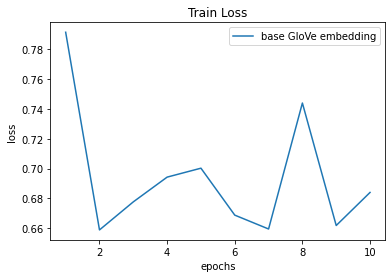

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
epochs = range(1,11)
glove_trainloss_log = [0.7915410399436951, 0.6588501930236816, 0.6776795983314514, 0.6942887902259827, 0.7002847194671631, 0.6687812805175781, 0.65947026014328, 0.7440286874771118, 0.6618101596832275, 0.6840071082115173]
evalloss_log = [0.6711509823799133, 0.6844974756240845, 0.7240248322486877, 0.7112922072410583, 0.7702271342277527, 0.7107248902320862, 0.6733245253562927, 0.6840847730636597, 0.7020852565765381, 0.7493972778320312]
evalacc_log = [59.13, 52.9, 43.93, 41.71, 34.00, 44.56, 56.71, 55.12, 47.1, 38.75]
plt.title('Train Loss')
plt.plot(epochs, glove_trainloss_log)
plt.legend(['base GloVe embedding'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()


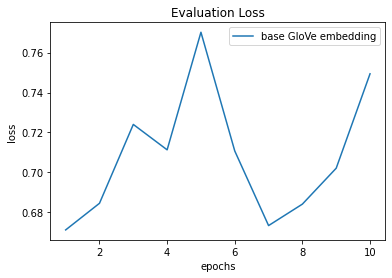

In [ ]:
plt.title('Evaluation Loss')
plt.plot(epochs, evalloss_log)
plt.legend(['base GloVe embedding'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()

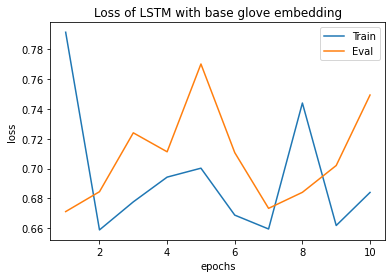

In [ ]:
plt.title('Loss of LSTM with base glove embedding')
plt.plot(epochs, glove_trainloss_log)
plt.plot(epochs, evalloss_log)
plt.legend(['Train', 'Eval'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()

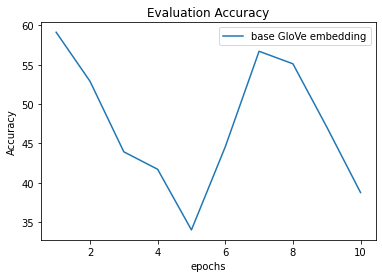

In [ ]:
plt.title('Evaluation Accuracy')
plt.plot(epochs, evalacc_log)
plt.legend(['base GloVe embedding'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [ ]:
model_file = 'model_lstmsenti.torch'
test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


TEST LOSS: 0.6977357268333435
Recall: 66.71768307040263
Precision: 45.20941364180295
F1-Score: 53.896999381806076
TEST ACC:  48.83%


Glovetwit200d

In [ ]:
#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_glovtwit.torch'
pre_trained_embedding_file = 'glovetwit200d'
Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.01, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.01, n_epochs=10)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)

100%|██████████| 1193514/1193514 [01:06<00:00, 17940.71it/s]


Embedding dimension : 200


16700it [00:00, 74556.99it/s]
<ipython-input-24-2db8c813ab7b>:97: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/10 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 2072/2072 [00:41<00:00, 49.56it/s]


FINISHED EPOCH: 1
train_loss: 0.7209221124649048


 10%|█         | 1/10 [00:42<06:19, 42.14s/it]


Evaluation LOSS: 0.6754068732261658
Evaluation ACC:  56.50%

epoch: 2


100%|██████████| 2072/2072 [00:41<00:00, 49.48it/s]


FINISHED EPOCH: 2
train_loss: 0.7205966114997864


 20%|██        | 2/10 [01:24<05:37, 42.17s/it]


Evaluation LOSS: 0.7097845673561096
Evaluation ACC:  44.38%

epoch: 3


100%|██████████| 2072/2072 [00:41<00:00, 49.45it/s]


FINISHED EPOCH: 3
train_loss: 0.7299187183380127


 30%|███       | 3/10 [02:06<04:55, 42.19s/it]


Evaluation LOSS: 0.6879646182060242
Evaluation ACC:  52.98%

epoch: 4


100%|██████████| 2072/2072 [00:43<00:00, 48.11it/s]


FINISHED EPOCH: 4
train_loss: 0.7050397992134094


 40%|████      | 4/10 [02:49<04:15, 42.66s/it]


Evaluation LOSS: 0.6649800539016724
Evaluation ACC:  59.43%

epoch: 5


100%|██████████| 2072/2072 [00:43<00:00, 47.12it/s]


FINISHED EPOCH: 5
train_loss: 0.6825920343399048


 50%|█████     | 5/10 [03:34<03:36, 43.25s/it]


Evaluation LOSS: 0.6869174838066101
Evaluation ACC:  50.60%

epoch: 6


100%|██████████| 2072/2072 [00:44<00:00, 46.79it/s]


FINISHED EPOCH: 6
train_loss: 0.6401993036270142


 60%|██████    | 6/10 [04:18<02:54, 43.71s/it]


Evaluation LOSS: 0.7002978324890137
Evaluation ACC:  46.46%

epoch: 7


100%|██████████| 2072/2072 [00:45<00:00, 46.03it/s]


FINISHED EPOCH: 7
train_loss: 0.6822452545166016


 70%|███████   | 7/10 [05:04<02:12, 44.23s/it]


Evaluation LOSS: 0.6977337002754211
Evaluation ACC:  49.03%

epoch: 8


100%|██████████| 2072/2072 [00:45<00:00, 45.53it/s]


FINISHED EPOCH: 8
train_loss: 0.7020639777183533


 80%|████████  | 8/10 [05:49<01:29, 44.74s/it]


Evaluation LOSS: 0.6898370981216431
Evaluation ACC:  50.91%

epoch: 9


100%|██████████| 2072/2072 [00:46<00:00, 44.49it/s]


FINISHED EPOCH: 9
train_loss: 0.6668064594268799


 90%|█████████ | 9/10 [06:36<00:45, 45.41s/it]


Evaluation LOSS: 0.6879474520683289
Evaluation ACC:  50.77%

epoch: 10


100%|██████████| 2072/2072 [00:46<00:00, 44.33it/s]


FINISHED EPOCH: 10
train_loss: 0.7008715867996216


100%|██████████| 10/10 [07:23<00:00, 44.39s/it]


Evaluation LOSS: 0.6594187617301941
Evaluation ACC:  58.55%



TEST LOSS: 0.6865599155426025
TEST ACC:  53.80%


Graph

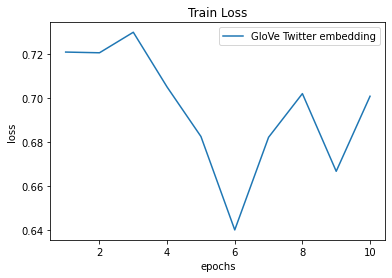

In [ ]:
Twitter_trainloss=[0.7209221124649048,
0.7205966114997864,
0.7299187183380127,
0.7050397992134094,
0.6825920343399048,
0.6401993036270142,
0.6822452545166016,
0.7020639777183533,
0.6668064594268799,
0.7008715867996216]

import numpy as np
import matplotlib.pyplot as plt
epochs = range(1,11)
glove_trainloss_log = [0.7915410399436951, 0.6588501930236816, 0.6776795983314514, 0.6942887902259827, 0.7002847194671631, 0.6687812805175781, 0.65947026014328, 0.7440286874771118, 0.6618101596832275, 0.6840071082115173]
Twitter_trainloss=[0.7209221124649048,
0.7205966114997864,
0.7299187183380127,
0.7050397992134094,
0.6825920343399048,
0.6401993036270142,
0.6822452545166016,
0.7020639777183533,
0.6668064594268799,
0.7008715867996216]
evalloss_log = [0.6711509823799133, 0.6844974756240845, 0.7240248322486877, 0.7112922072410583, 0.7702271342277527, 0.7107248902320862, 0.6733245253562927, 0.6840847730636597, 0.7020852565765381, 0.7493972778320312]
Twitter_evalloss_log = [0.6754068732261658,
0.7097845673561096,
0.6879646182060242,
0.6649800539016724,
0.6869174838066101,
0.7002978324890137,
0.6977337002754211,
0.6898370981216431,
0.6879474520683289,
0.6594187617301941
]
evalacc_log = [59.13, 52.9, 43.93, 41.71, 34.00, 44.56, 56.71, 55.12, 47.1, 38.75]
Twitter_evalacc_log = [56.5,
44.38,
52.98,
59.43,
50.60,
46.46,
49.03,
50.91,
50.77,
58.55
]
plt.title('Train Loss')
# plt.plot(epochs, glove_trainloss_log)
plt.plot(epochs, Twitter_trainloss)
plt.legend(['GloVe Twitter embedding'])
# plt.legend(['base GloVe embedding', 'GloVe Twitter embedding'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()

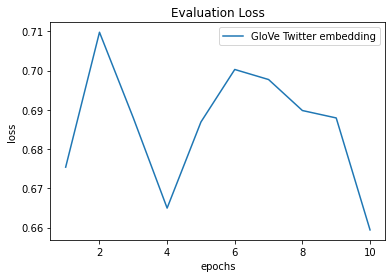

In [ ]:
plt.title('Evaluation Loss')
plt.plot(epochs, Twitter_evalloss_log)
plt.legend(['GloVe Twitter embedding'])

# plt.legend(['base GloVe embedding'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()

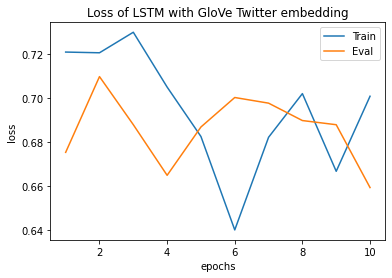

In [ ]:
plt.title('Loss of LSTM with GloVe Twitter embedding')
plt.plot(epochs, Twitter_trainloss)
plt.plot(epochs, Twitter_evalloss_log)
plt.legend(['Train', 'Eval'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()


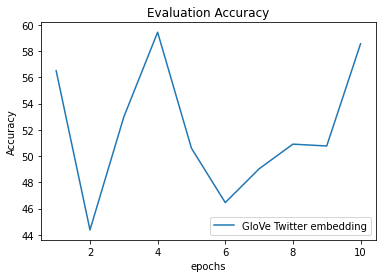

In [ ]:
plt.title('Evaluation Accuracy')
plt.plot(epochs, Twitter_evalacc_log)
plt.legend(['GloVe Twitter embedding'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()
plt.close()

Emotag

In [ ]:
#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_Emotag.torch'
pre_trained_embedding_file = 'Emotag'
Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.01, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.01, n_epochs=10)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)

100%|██████████| 401030/401030 [01:57<00:00, 3408.58it/s]


Embedding dimension : 620


16700it [00:00, 31037.92it/s]
<ipython-input-24-2db8c813ab7b>:97: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/10 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 2072/2072 [00:51<00:00, 40.45it/s]


FINISHED EPOCH: 1
train_loss: 0.6837584972381592


 10%|█         | 1/10 [00:51<07:45, 51.70s/it]


Evaluation LOSS: 0.7175236344337463
Evaluation ACC:  42.53%

epoch: 2


100%|██████████| 2072/2072 [00:51<00:00, 40.24it/s]


FINISHED EPOCH: 2
train_loss: 0.6624542474746704


 20%|██        | 2/10 [01:43<06:54, 51.86s/it]


Evaluation LOSS: 0.6696091890335083
Evaluation ACC:  57.92%

epoch: 3


100%|██████████| 2072/2072 [00:52<00:00, 39.79it/s]


FINISHED EPOCH: 3
train_loss: 0.6999170184135437


 30%|███       | 3/10 [02:36<06:05, 52.18s/it]


Evaluation LOSS: 0.6797375082969666
Evaluation ACC:  55.16%

epoch: 4


100%|██████████| 2072/2072 [00:52<00:00, 39.51it/s]


FINISHED EPOCH: 4
train_loss: 0.7078381776809692


 40%|████      | 4/10 [03:29<05:14, 52.48s/it]


Evaluation LOSS: 0.6721330285072327
Evaluation ACC:  56.22%

epoch: 5


100%|██████████| 2072/2072 [00:53<00:00, 38.67it/s]


FINISHED EPOCH: 5
train_loss: 0.642255961894989


 50%|█████     | 5/10 [04:23<04:25, 53.06s/it]


Evaluation LOSS: 0.6733596920967102
Evaluation ACC:  57.18%

epoch: 6


100%|██████████| 2072/2072 [00:54<00:00, 37.83it/s]


FINISHED EPOCH: 6
train_loss: 0.6851504445075989


 60%|██████    | 6/10 [05:18<03:35, 53.82s/it]


Evaluation LOSS: 0.6687186360359192
Evaluation ACC:  57.68%

epoch: 7


100%|██████████| 2072/2072 [00:56<00:00, 36.93it/s]


FINISHED EPOCH: 7
train_loss: 0.6925479173660278


 70%|███████   | 7/10 [06:15<02:44, 54.73s/it]


Evaluation LOSS: 0.6915253400802612
Evaluation ACC:  50.57%

epoch: 8


100%|██████████| 2072/2072 [00:57<00:00, 35.76it/s]


FINISHED EPOCH: 8
train_loss: 0.6869674921035767


 80%|████████  | 8/10 [07:13<01:51, 55.92s/it]


Evaluation LOSS: 0.680383026599884
Evaluation ACC:  52.93%

epoch: 9


100%|██████████| 2072/2072 [00:59<00:00, 34.60it/s]


FINISHED EPOCH: 9
train_loss: 0.7050788402557373


 90%|█████████ | 9/10 [08:14<00:57, 57.33s/it]


Evaluation LOSS: 0.69972163438797
Evaluation ACC:  48.77%

epoch: 10


100%|██████████| 2072/2072 [01:00<00:00, 34.12it/s]


FINISHED EPOCH: 10
train_loss: 0.7232070565223694


100%|██████████| 10/10 [09:15<00:00, 55.53s/it]


Evaluation LOSS: 0.6877505779266357
Evaluation ACC:  50.68%



TEST LOSS: 0.675291121006012
TEST ACC:  56.50%


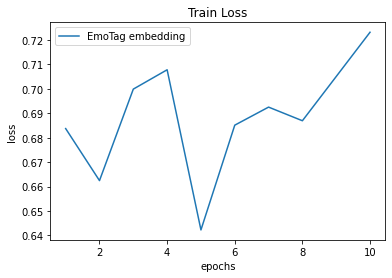

In [ ]:
Twitter_trainloss=[0.7209221124649048,
0.7205966114997864,
0.7299187183380127,
0.7050397992134094,
0.6825920343399048,
0.6401993036270142,
0.6822452545166016,
0.7020639777183533,
0.6668064594268799,
0.7008715867996216]

import numpy as np
import matplotlib.pyplot as plt
epochs = range(1,11)
glove_trainloss_log = [0.7915410399436951, 0.6588501930236816, 0.6776795983314514, 0.6942887902259827, 0.7002847194671631, 0.6687812805175781, 0.65947026014328, 0.7440286874771118, 0.6618101596832275, 0.6840071082115173]
Twitter_trainloss=[0.7209221124649048,
0.7205966114997864,
0.7299187183380127,
0.7050397992134094,
0.6825920343399048,
0.6401993036270142,
0.6822452545166016,
0.7020639777183533,
0.6668064594268799,
0.7008715867996216]
Emotag_train_loss =[0.6837584972381592,
0.6624542474746704,
0.6999170184135437,
0.7078381776809692,
0.642255961894989,
0.6851504445075989,
0.6925479173660278,
0.6869674921035767,
0.7050788402557373,
0.7232070565223694
]

evalloss_log = [0.6711509823799133, 0.6844974756240845, 0.7240248322486877, 0.7112922072410583, 0.7702271342277527, 0.7107248902320862, 0.6733245253562927, 0.6840847730636597, 0.7020852565765381, 0.7493972778320312]
Twitter_evalloss_log = [0.6754068732261658,
0.7097845673561096,
0.6879646182060242,
0.6649800539016724,
0.6869174838066101,
0.7002978324890137,
0.6977337002754211,
0.6898370981216431,
0.6879474520683289,
0.6594187617301941
]
Emotag_eval_loss=[0.7175236344337463,
0.6696091890335083,
0.6797375082969666,
0.6721330285072327,
0.6733596920967102,
0.6687186360359192,
0.6915253400802612,
0.680383026599884,
0.69972163438797,
0.6877505779266357
]

evalacc_log = [59.13, 52.9, 43.93, 41.71, 34.00, 44.56, 56.71, 55.12, 47.1, 38.75]
Twitter_evalacc_log = [56.5,
44.38,
52.98,
59.43,
50.60,
46.46,
49.03,
50.91,
50.77,
58.55
]
Emotag_evalacc_log=[42.53,
57.92,
55.16,
56.22,
57.18,
57.68,
50.57,
52.93,
48.77,
50.68
]
plt.title('Train Loss')
# plt.plot(epochs, glove_trainloss_log)
plt.plot(epochs, Emotag_train_loss)
plt.legend(['EmoTag embedding'])
# plt.legend(['base GloVe embedding', 'GloVe Twitter embedding'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()

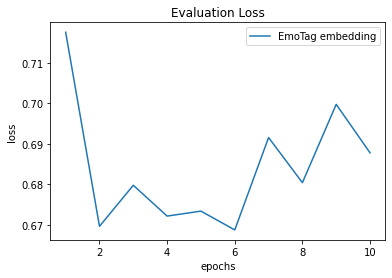

In [ ]:
plt.title('Evaluation Loss')
plt.plot(epochs, Emotag_eval_loss)
plt.legend(['EmoTag embedding'])

# plt.legend(['base GloVe embedding'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()

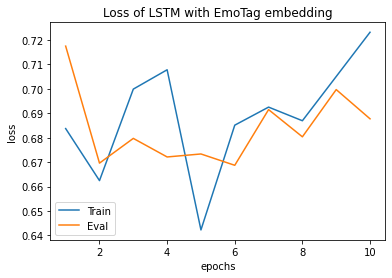

In [ ]:
plt.title('Loss of LSTM with EmoTag embedding')
plt.plot(epochs, Emotag_train_loss)
plt.plot(epochs, Emotag_eval_loss)
plt.legend(['Train', 'Eval'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()


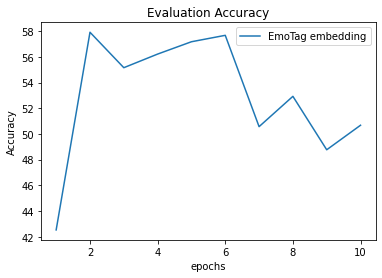

In [ ]:
plt.title('Evaluation Accuracy')
plt.plot(epochs, Emotag_evalacc_log)
plt.legend(['EmoTag embedding'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()
plt.close()

# Precision Recall F1

In [ ]:
Full_Data = Load_parquet("parquet/2013/01")

Glove 200d

In [ ]:
#'glove200d', 'glovetwit200d', 'Emotag'

pre_trained_embedding_file = 'glove200d'
Train_set, Eval_set, gTest_set, vocab_dict, gweight_mat, list_of_lens_in_batch, Eval_len, gTest_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)


100%|██████████| 400000/400000 [00:20<00:00, 19950.17it/s]


Embedding dimension : 200


16700it [00:00, 73767.63it/s]
<ipython-input-12-8ba3a0104568>:126: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


In [ ]:
model_file = 'model_lstmsenti.torch'
test(gTest_set, HIDDEN_DIM, TAGSET_SIZE, gweight_mat, gTest_len, model_file)

Glove twitter 200d

In [ ]:
#'glove200d', 'glovetwit200d', 'Emotag'

pre_trained_embedding_file = 'glovetwit200d'
Train_set, Eval_set, gtTest_set, vocab_dict, gtweight_mat, list_of_lens_in_batch, Eval_len, gtTest_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)

100%|██████████| 1193514/1193514 [01:04<00:00, 18389.52it/s]


Embedding dimension : 200


16700it [00:00, 74368.51it/s]
<ipython-input-12-8ba3a0104568>:126: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


In [ ]:
model_file = 'model_lstmsenti_glovtwit.torch'
test(gtTest_set, HIDDEN_DIM, TAGSET_SIZE, gtweight_mat, gtTest_len, model_file)


TEST LOSS: 0.687686562538147
Recall: 66.44857115366112
Precision: 55.093737534902274
F1-Score: 60.24075366364271
TEST ACC:  51.89%


EmoTag

In [ ]:
#'glove200d', 'glovetwit200d', 'Emotag'

pre_trained_embedding_file = 'Emotag'
Train_set, Eval_set, eTest_set, vocab_dict, eweight_mat, list_of_lens_in_batch, Eval_len, eTest_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)

100%|██████████| 401030/401030 [01:58<00:00, 3397.66it/s]


Embedding dimension : 620


16700it [00:00, 30952.82it/s]
<ipython-input-12-8ba3a0104568>:126: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


In [ ]:
model_file = 'model_lstmsenti_Emotag.torch'
test(eTest_set, HIDDEN_DIM, TAGSET_SIZE, eweight_mat, eTest_len, model_file)


TEST LOSS: 0.6826494336128235
Recall: 66.06327593111733
Precision: 65.79976067012365
F1-Score: 65.93125499600319
TEST ACC:  55.01%


# Experiment lr=0.001 batch 32, larger data ( 2 instead 1 file)

In [ ]:
Full_Data = Load_parquet("parquet/2013/01")


Normal glove

In [ ]:

#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_001.torch'
pre_trained_embedding_file = 'glove200d'
Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.001, n_epochs=30)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


100%|██████████| 400000/400000 [00:20<00:00, 19791.73it/s]


Embedding dimension : 200


29819it [00:00, 58864.01it/s]
<ipython-input-5-2ffc02e1b240>:122: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/30 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 4283/4283 [01:28<00:00, 48.45it/s]


FINISHED EPOCH: 1
train_loss: 0.6417090892791748


  3%|▎         | 1/30 [01:29<43:05, 89.17s/it]


Evaluation LOSS: 0.67440265417099
Evaluation ACC:  57.98%

epoch: 2


100%|██████████| 4283/4283 [01:27<00:00, 48.92it/s]


FINISHED EPOCH: 2
train_loss: 0.6983457803726196


  7%|▋         | 2/30 [02:57<41:20, 88.60s/it]


Evaluation LOSS: 0.6715856194496155
Evaluation ACC:  60.09%

epoch: 3


100%|██████████| 4283/4283 [01:27<00:00, 48.68it/s]


FINISHED EPOCH: 3
train_loss: 0.6594986319541931


 10%|█         | 3/30 [04:25<39:52, 88.60s/it]


Evaluation LOSS: 0.7051770091056824
Evaluation ACC:  45.35%

epoch: 4


100%|██████████| 4283/4283 [01:27<00:00, 48.95it/s]


FINISHED EPOCH: 4
train_loss: 0.7158131003379822


 13%|█▎        | 4/30 [05:54<38:18, 88.40s/it]


Evaluation LOSS: 0.6730931997299194
Evaluation ACC:  57.89%

epoch: 5


100%|██████████| 4283/4283 [01:27<00:00, 49.03it/s]


FINISHED EPOCH: 5
train_loss: 0.6980249285697937


 17%|█▋        | 5/30 [07:22<36:46, 88.25s/it]


Evaluation LOSS: 0.7374482154846191
Evaluation ACC:  36.10%

epoch: 6


100%|██████████| 4283/4283 [01:27<00:00, 48.97it/s]


FINISHED EPOCH: 6
train_loss: 0.6516442894935608


 20%|██        | 6/30 [08:50<35:16, 88.19s/it]


Evaluation LOSS: 0.6725269556045532
Evaluation ACC:  55.98%

epoch: 7


100%|██████████| 4283/4283 [01:26<00:00, 49.39it/s]


FINISHED EPOCH: 7
train_loss: 0.7090222835540771


 23%|██▎       | 7/30 [10:17<33:41, 87.91s/it]


Evaluation LOSS: 0.6962385773658752
Evaluation ACC:  48.87%

epoch: 8


100%|██████████| 4283/4283 [01:26<00:00, 49.45it/s]


FINISHED EPOCH: 8
train_loss: 0.704438328742981


 27%|██▋       | 8/30 [11:44<32:09, 87.69s/it]


Evaluation LOSS: 0.6856271028518677
Evaluation ACC:  53.04%

epoch: 9


100%|██████████| 4283/4283 [01:26<00:00, 49.27it/s]


FINISHED EPOCH: 9
train_loss: 0.6894145011901855


 30%|███       | 9/30 [13:12<30:40, 87.65s/it]


Evaluation LOSS: 0.7169347405433655
Evaluation ACC:  40.07%

epoch: 10


100%|██████████| 4283/4283 [01:26<00:00, 49.46it/s]


FINISHED EPOCH: 10
train_loss: 0.6884341835975647


 33%|███▎      | 10/30 [14:39<29:10, 87.52s/it]


Evaluation LOSS: 0.6886312961578369
Evaluation ACC:  51.99%

epoch: 11


100%|██████████| 4283/4283 [01:26<00:00, 49.37it/s]


FINISHED EPOCH: 11
train_loss: 0.6750971078872681


 37%|███▋      | 11/30 [16:06<27:42, 87.48s/it]


Evaluation LOSS: 0.6979579329490662
Evaluation ACC:  46.66%

epoch: 12


100%|██████████| 4283/4283 [01:27<00:00, 48.88it/s]


FINISHED EPOCH: 12
train_loss: 0.6953202486038208


 40%|████      | 12/30 [17:35<26:18, 87.71s/it]


Evaluation LOSS: 0.6858376264572144
Evaluation ACC:  54.56%

epoch: 13


100%|██████████| 4283/4283 [01:26<00:00, 49.66it/s]


FINISHED EPOCH: 13
train_loss: 0.6789199709892273


 43%|████▎     | 13/30 [19:01<24:46, 87.46s/it]


Evaluation LOSS: 0.6902089715003967
Evaluation ACC:  51.58%

epoch: 14


100%|██████████| 4283/4283 [01:27<00:00, 49.17it/s]


FINISHED EPOCH: 14
train_loss: 0.7026379704475403


 47%|████▋     | 14/30 [20:29<23:20, 87.54s/it]


Evaluation LOSS: 0.6904187202453613
Evaluation ACC:  52.25%

epoch: 15


100%|██████████| 4283/4283 [01:26<00:00, 49.63it/s]


FINISHED EPOCH: 15
train_loss: 0.6990073919296265


 50%|█████     | 15/30 [21:56<21:51, 87.40s/it]


Evaluation LOSS: 0.7041594386100769
Evaluation ACC:  44.58%

epoch: 16


100%|██████████| 4283/4283 [01:25<00:00, 49.87it/s]


FINISHED EPOCH: 16
train_loss: 0.7120844125747681


 53%|█████▎    | 16/30 [23:23<20:19, 87.14s/it]


Evaluation LOSS: 0.6942288279533386
Evaluation ACC:  49.63%

epoch: 17


100%|██████████| 4283/4283 [01:26<00:00, 49.52it/s]


FINISHED EPOCH: 17
train_loss: 0.6956572532653809


 57%|█████▋    | 17/30 [24:50<18:52, 87.13s/it]


Evaluation LOSS: 0.6866198778152466
Evaluation ACC:  53.44%

epoch: 18


100%|██████████| 4283/4283 [01:26<00:00, 49.70it/s]


FINISHED EPOCH: 18
train_loss: 0.6761541366577148


 60%|██████    | 18/30 [26:17<17:24, 87.04s/it]


Evaluation LOSS: 0.6803508996963501
Evaluation ACC:  56.52%

epoch: 19


100%|██████████| 4283/4283 [01:24<00:00, 50.68it/s]


FINISHED EPOCH: 19
train_loss: 0.6885774731636047


 63%|██████▎   | 19/30 [27:42<15:51, 86.46s/it]


Evaluation LOSS: 0.689131498336792
Evaluation ACC:  52.43%

epoch: 20


100%|██████████| 4283/4283 [01:24<00:00, 50.84it/s]


FINISHED EPOCH: 20
train_loss: 0.6970848441123962


 67%|██████▋   | 20/30 [29:07<14:19, 85.98s/it]


Evaluation LOSS: 0.6921870708465576
Evaluation ACC:  51.61%

epoch: 21


100%|██████████| 4283/4283 [01:24<00:00, 50.65it/s]


FINISHED EPOCH: 21
train_loss: 0.7128686308860779


 70%|███████   | 21/30 [30:32<12:51, 85.74s/it]


Evaluation LOSS: 0.6884453296661377
Evaluation ACC:  54.25%

epoch: 22


100%|██████████| 4283/4283 [01:23<00:00, 51.02it/s]


FINISHED EPOCH: 22
train_loss: 0.6856234669685364


 73%|███████▎  | 22/30 [31:56<11:23, 85.39s/it]


Evaluation LOSS: 0.6921965479850769
Evaluation ACC:  50.63%

epoch: 23


100%|██████████| 4283/4283 [01:23<00:00, 51.15it/s]


FINISHED EPOCH: 23
train_loss: 0.6977444291114807


 77%|███████▋  | 23/30 [33:21<09:55, 85.08s/it]


Evaluation LOSS: 0.684057891368866
Evaluation ACC:  55.95%

epoch: 24


100%|██████████| 4283/4283 [01:24<00:00, 50.50it/s]


FINISHED EPOCH: 24
train_loss: 0.6981235146522522


 80%|████████  | 24/30 [34:46<08:31, 85.19s/it]


Evaluation LOSS: 0.690284788608551
Evaluation ACC:  50.93%

epoch: 25


100%|██████████| 4283/4283 [01:23<00:00, 51.20it/s]


FINISHED EPOCH: 25
train_loss: 0.7052007913589478


 83%|████████▎ | 25/30 [36:11<07:04, 84.91s/it]


Evaluation LOSS: 0.692750096321106
Evaluation ACC:  50.77%

epoch: 26


100%|██████████| 4283/4283 [01:23<00:00, 50.99it/s]


FINISHED EPOCH: 26
train_loss: 0.7191935777664185


 87%|████████▋ | 26/30 [37:35<05:39, 84.83s/it]


Evaluation LOSS: 0.7032725811004639
Evaluation ACC:  43.71%

epoch: 27


100%|██████████| 4283/4283 [01:23<00:00, 51.16it/s]


FINISHED EPOCH: 27
train_loss: 0.7004210352897644


 90%|█████████ | 27/30 [38:59<04:14, 84.68s/it]


Evaluation LOSS: 0.6880492568016052
Evaluation ACC:  54.61%

epoch: 28


100%|██████████| 4283/4283 [01:24<00:00, 50.87it/s]


FINISHED EPOCH: 28
train_loss: 0.71540766954422


 93%|█████████▎| 28/30 [40:24<02:49, 84.73s/it]


Evaluation LOSS: 0.6972994208335876
Evaluation ACC:  48.02%

epoch: 29


100%|██████████| 4283/4283 [01:24<00:00, 50.88it/s]


FINISHED EPOCH: 29
train_loss: 0.692998468875885


 97%|█████████▋| 29/30 [41:49<01:24, 84.75s/it]


Evaluation LOSS: 0.6895468235015869
Evaluation ACC:  50.98%

epoch: 30


100%|██████████| 4283/4283 [01:23<00:00, 51.14it/s]


FINISHED EPOCH: 30
train_loss: 0.6812344789505005


100%|██████████| 30/30 [43:14<00:00, 86.47s/it]


Evaluation LOSS: 0.7057119011878967
Evaluation ACC:  44.28%



TEST LOSS: 0.6913386583328247
TEST ACC:  50.19%


glovetwitt

In [ ]:

#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_gltwit001.torch'
pre_trained_embedding_file = 'glovetwit200d'
# Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.001, n_epochs=30)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


100%|██████████| 1193514/1193514 [01:02<00:00, 19129.48it/s]


Embedding dimension : 200


29819it [00:00, 73095.78it/s]
<ipython-input-50-2ffc02e1b240>:122: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/30 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 4283/4283 [01:23<00:00, 51.04it/s]


FINISHED EPOCH: 1
train_loss: 0.6455841064453125


  3%|▎         | 1/30 [01:24<40:51, 84.53s/it]


Evaluation LOSS: 0.6815106272697449
Evaluation ACC:  55.11%

epoch: 2


100%|██████████| 4283/4283 [01:24<00:00, 50.94it/s]


FINISHED EPOCH: 2
train_loss: 0.7059131860733032


  7%|▋         | 2/30 [02:49<39:29, 84.62s/it]


Evaluation LOSS: 0.6798591017723083
Evaluation ACC:  57.39%

epoch: 3


100%|██████████| 4283/4283 [01:24<00:00, 50.79it/s]


FINISHED EPOCH: 3
train_loss: 0.6621090769767761


 10%|█         | 3/30 [04:14<38:08, 84.77s/it]


Evaluation LOSS: 0.7152442932128906
Evaluation ACC:  41.43%

epoch: 4


100%|██████████| 4283/4283 [01:24<00:00, 50.54it/s]


FINISHED EPOCH: 4
train_loss: 0.7170959711074829


 13%|█▎        | 4/30 [05:39<36:49, 85.00s/it]


Evaluation LOSS: 0.67026686668396
Evaluation ACC:  59.26%

epoch: 5


100%|██████████| 4283/4283 [01:24<00:00, 50.41it/s]


FINISHED EPOCH: 5
train_loss: 0.6939024329185486


 17%|█▋        | 5/30 [07:05<35:30, 85.21s/it]


Evaluation LOSS: 0.7221811413764954
Evaluation ACC:  39.56%

epoch: 6


100%|██████████| 4283/4283 [01:25<00:00, 49.90it/s]


FINISHED EPOCH: 6
train_loss: 0.678746223449707


 20%|██        | 6/30 [08:31<34:15, 85.63s/it]


Evaluation LOSS: 0.7050144672393799
Evaluation ACC:  43.36%

epoch: 7


100%|██████████| 4283/4283 [01:27<00:00, 49.00it/s]


FINISHED EPOCH: 7
train_loss: 0.7275265455245972


 23%|██▎       | 7/30 [09:59<33:07, 86.42s/it]


Evaluation LOSS: 0.6879286766052246
Evaluation ACC:  52.61%

epoch: 8


100%|██████████| 4283/4283 [01:27<00:00, 49.22it/s]


FINISHED EPOCH: 8
train_loss: 0.6831313967704773


 27%|██▋       | 8/30 [11:27<31:49, 86.80s/it]


Evaluation LOSS: 0.6748923063278198
Evaluation ACC:  59.55%

epoch: 9


100%|██████████| 4283/4283 [01:27<00:00, 48.83it/s]


FINISHED EPOCH: 9
train_loss: 0.7221260070800781


 30%|███       | 9/30 [12:55<30:32, 87.28s/it]


Evaluation LOSS: 0.708970308303833
Evaluation ACC:  45.58%

epoch: 10


100%|██████████| 4283/4283 [01:27<00:00, 49.19it/s]


FINISHED EPOCH: 10
train_loss: 0.6636242866516113


 33%|███▎      | 10/30 [14:23<29:08, 87.41s/it]


Evaluation LOSS: 0.7006151676177979
Evaluation ACC:  47.26%

epoch: 11


100%|██████████| 4283/4283 [01:25<00:00, 49.86it/s]


FINISHED EPOCH: 11
train_loss: 0.6790996193885803


 37%|███▋      | 11/30 [15:49<27:35, 87.14s/it]


Evaluation LOSS: 0.6935549974441528
Evaluation ACC:  49.44%

epoch: 12


100%|██████████| 4283/4283 [01:26<00:00, 49.45it/s]


FINISHED EPOCH: 12
train_loss: 0.7347800135612488


 40%|████      | 12/30 [17:17<26:09, 87.17s/it]


Evaluation LOSS: 0.7051665186882019
Evaluation ACC:  44.28%

epoch: 13


100%|██████████| 4283/4283 [01:25<00:00, 50.22it/s]


FINISHED EPOCH: 13
train_loss: 0.6827288269996643


 43%|████▎     | 13/30 [18:42<24:35, 86.79s/it]


Evaluation LOSS: 0.6910505294799805
Evaluation ACC:  51.54%

epoch: 14


100%|██████████| 4283/4283 [01:24<00:00, 50.59it/s]


FINISHED EPOCH: 14
train_loss: 0.6971068978309631


 47%|████▋     | 14/30 [20:08<23:01, 86.33s/it]


Evaluation LOSS: 0.703405499458313
Evaluation ACC:  48.12%

epoch: 15


100%|██████████| 4283/4283 [01:24<00:00, 50.88it/s]


FINISHED EPOCH: 15
train_loss: 0.6935513615608215


 50%|█████     | 15/30 [21:32<21:28, 85.87s/it]


Evaluation LOSS: 0.7154384851455688
Evaluation ACC:  40.52%

epoch: 16


100%|██████████| 4283/4283 [01:24<00:00, 50.81it/s]


FINISHED EPOCH: 16
train_loss: 0.683535099029541


 53%|█████▎    | 16/30 [22:57<19:58, 85.58s/it]


Evaluation LOSS: 0.705697774887085
Evaluation ACC:  43.19%

epoch: 17


100%|██████████| 4283/4283 [01:24<00:00, 50.80it/s]


FINISHED EPOCH: 17
train_loss: 0.6949916481971741


 57%|█████▋    | 17/30 [24:22<18:30, 85.39s/it]


Evaluation LOSS: 0.6877659559249878
Evaluation ACC:  53.16%

epoch: 18


100%|██████████| 4283/4283 [01:24<00:00, 50.78it/s]


FINISHED EPOCH: 18
train_loss: 0.6751664876937866


 60%|██████    | 18/30 [25:47<17:03, 85.25s/it]


Evaluation LOSS: 0.6864219903945923
Evaluation ACC:  52.10%

epoch: 19


100%|██████████| 4283/4283 [01:24<00:00, 50.73it/s]


FINISHED EPOCH: 19
train_loss: 0.657261073589325


 63%|██████▎   | 19/30 [27:12<15:37, 85.19s/it]


Evaluation LOSS: 0.6840450763702393
Evaluation ACC:  54.97%

epoch: 20


100%|██████████| 4283/4283 [01:25<00:00, 50.27it/s]


FINISHED EPOCH: 20
train_loss: 0.7000671625137329


 67%|██████▋   | 20/30 [28:38<14:13, 85.38s/it]


Evaluation LOSS: 0.6904033422470093
Evaluation ACC:  51.53%

epoch: 21


100%|██████████| 4283/4283 [01:25<00:00, 50.13it/s]


FINISHED EPOCH: 21
train_loss: 0.715528666973114


 70%|███████   | 21/30 [30:04<12:50, 85.58s/it]


Evaluation LOSS: 0.6866210699081421
Evaluation ACC:  54.92%

epoch: 22


100%|██████████| 4283/4283 [01:25<00:00, 49.84it/s]


FINISHED EPOCH: 22
train_loss: 0.6730544567108154


 73%|███████▎  | 22/30 [31:31<11:26, 85.87s/it]


Evaluation LOSS: 0.6963463425636292
Evaluation ACC:  48.88%

epoch: 23


100%|██████████| 4283/4283 [01:25<00:00, 49.82it/s]


FINISHED EPOCH: 23
train_loss: 0.6996618509292603


 77%|███████▋  | 23/30 [32:57<10:02, 86.08s/it]


Evaluation LOSS: 0.6832794547080994
Evaluation ACC:  56.44%

epoch: 24


100%|██████████| 4283/4283 [01:25<00:00, 49.99it/s]


FINISHED EPOCH: 24
train_loss: 0.6849581003189087


 80%|████████  | 24/30 [34:24<08:36, 86.15s/it]


Evaluation LOSS: 0.6928897500038147
Evaluation ACC:  50.39%

epoch: 25


100%|██████████| 4283/4283 [01:26<00:00, 49.56it/s]


FINISHED EPOCH: 25
train_loss: 0.6989033818244934


 83%|████████▎ | 25/30 [35:51<07:12, 86.41s/it]


Evaluation LOSS: 0.688189685344696
Evaluation ACC:  54.21%

epoch: 26


100%|██████████| 4283/4283 [01:27<00:00, 49.21it/s]


FINISHED EPOCH: 26
train_loss: 0.7151131629943848


 87%|████████▋ | 26/30 [37:18<05:47, 86.79s/it]


Evaluation LOSS: 0.7041940093040466
Evaluation ACC:  44.56%

epoch: 27


100%|██████████| 4283/4283 [01:27<00:00, 49.15it/s]


FINISHED EPOCH: 27
train_loss: 0.6804015636444092


 90%|█████████ | 27/30 [38:46<04:21, 87.07s/it]


Evaluation LOSS: 0.702721893787384
Evaluation ACC:  45.50%

epoch: 28


100%|██████████| 4283/4283 [01:26<00:00, 49.42it/s]


FINISHED EPOCH: 28
train_loss: 0.7053883671760559


 93%|█████████▎| 28/30 [40:13<02:54, 87.13s/it]


Evaluation LOSS: 0.6995129585266113
Evaluation ACC:  45.90%

epoch: 29


100%|██████████| 4283/4283 [01:26<00:00, 49.63it/s]


FINISHED EPOCH: 29
train_loss: 0.6742345094680786


 97%|█████████▋| 29/30 [41:40<01:27, 87.07s/it]


Evaluation LOSS: 0.6990151405334473
Evaluation ACC:  45.88%

epoch: 30


100%|██████████| 4283/4283 [01:28<00:00, 48.62it/s]


FINISHED EPOCH: 30
train_loss: 0.6872574687004089


100%|██████████| 30/30 [43:09<00:00, 86.31s/it]


Evaluation LOSS: 0.6974246501922607
Evaluation ACC:  47.91%



TEST LOSS: 0.6885067820549011
TEST ACC:  53.02%


emotag

In [ ]:

#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_emotag001.torch'
pre_trained_embedding_file = 'Emotag'
# Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.001, n_epochs=30)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


100%|██████████| 401030/401030 [01:57<00:00, 3425.42it/s]


Embedding dimension : 620


29819it [00:00, 30946.49it/s]
<ipython-input-5-2ffc02e1b240>:122: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/30 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 4283/4283 [01:48<00:00, 39.56it/s]


FINISHED EPOCH: 1
train_loss: 0.6830171346664429


  3%|▎         | 1/30 [01:49<52:51, 109.38s/it]


Evaluation LOSS: 0.668490469455719
Evaluation ACC:  59.00%

epoch: 2


100%|██████████| 4283/4283 [01:48<00:00, 39.34it/s]


FINISHED EPOCH: 2
train_loss: 0.658682644367218


  7%|▋         | 2/30 [03:39<51:09, 109.63s/it]


Evaluation LOSS: 0.6729505658149719
Evaluation ACC:  54.25%

epoch: 3


100%|██████████| 4283/4283 [01:50<00:00, 38.91it/s]


FINISHED EPOCH: 3
train_loss: 0.6872830390930176


 10%|█         | 3/30 [05:30<49:37, 110.27s/it]


Evaluation LOSS: 0.6935447454452515
Evaluation ACC:  49.61%

epoch: 4


100%|██████████| 4283/4283 [01:49<00:00, 39.04it/s]


FINISHED EPOCH: 4
train_loss: 0.6896899938583374


 13%|█▎        | 4/30 [07:20<47:50, 110.41s/it]


Evaluation LOSS: 0.6670558452606201
Evaluation ACC:  59.51%

epoch: 5


100%|██████████| 4283/4283 [01:48<00:00, 39.35it/s]


FINISHED EPOCH: 5
train_loss: 0.6735215187072754


 17%|█▋        | 5/30 [09:10<45:54, 110.17s/it]


Evaluation LOSS: 0.6831199526786804
Evaluation ACC:  55.35%

epoch: 6


100%|██████████| 4283/4283 [01:50<00:00, 38.88it/s]


FINISHED EPOCH: 6
train_loss: 0.7014065384864807


 20%|██        | 6/30 [11:01<44:11, 110.49s/it]


Evaluation LOSS: 0.6957483291625977
Evaluation ACC:  49.26%

epoch: 7


100%|██████████| 4283/4283 [01:49<00:00, 38.97it/s]


FINISHED EPOCH: 7
train_loss: 0.6812889575958252


 23%|██▎       | 7/30 [12:52<42:23, 110.60s/it]


Evaluation LOSS: 0.6817676424980164
Evaluation ACC:  55.80%

epoch: 8


100%|██████████| 4283/4283 [01:50<00:00, 38.93it/s]


FINISHED EPOCH: 8
train_loss: 0.68138587474823


 27%|██▋       | 8/30 [14:43<40:35, 110.71s/it]


Evaluation LOSS: 0.7069178819656372
Evaluation ACC:  44.81%

epoch: 9


100%|██████████| 4283/4283 [01:49<00:00, 39.02it/s]


FINISHED EPOCH: 9
train_loss: 0.6959747672080994


 30%|███       | 9/30 [16:34<38:44, 110.71s/it]


Evaluation LOSS: 0.7082992792129517
Evaluation ACC:  42.47%

epoch: 10


100%|██████████| 4283/4283 [01:49<00:00, 39.15it/s]


FINISHED EPOCH: 10
train_loss: 0.6928912997245789


 33%|███▎      | 10/30 [18:24<36:51, 110.60s/it]


Evaluation LOSS: 0.6809250712394714
Evaluation ACC:  55.37%

epoch: 11


100%|██████████| 4283/4283 [01:49<00:00, 39.20it/s]


FINISHED EPOCH: 11
train_loss: 0.6780874133110046


 37%|███▋      | 11/30 [20:14<34:59, 110.47s/it]


Evaluation LOSS: 0.7108550667762756
Evaluation ACC:  42.19%

epoch: 12


100%|██████████| 4283/4283 [01:48<00:00, 39.32it/s]


FINISHED EPOCH: 12
train_loss: 0.6885827779769897


 40%|████      | 12/30 [22:04<33:05, 110.29s/it]


Evaluation LOSS: 0.7030115723609924
Evaluation ACC:  46.86%

epoch: 13


100%|██████████| 4283/4283 [01:49<00:00, 39.23it/s]


FINISHED EPOCH: 13
train_loss: 0.6905403733253479


 43%|████▎     | 13/30 [23:54<31:14, 110.24s/it]


Evaluation LOSS: 0.6985683441162109
Evaluation ACC:  48.69%

epoch: 14


100%|██████████| 4283/4283 [01:49<00:00, 39.09it/s]


FINISHED EPOCH: 14
train_loss: 0.7073550224304199


 47%|████▋     | 14/30 [25:45<29:25, 110.32s/it]


Evaluation LOSS: 0.6914183497428894
Evaluation ACC:  51.75%

epoch: 15


100%|██████████| 4283/4283 [01:49<00:00, 39.18it/s]


FINISHED EPOCH: 15
train_loss: 0.7170889377593994


 50%|█████     | 15/30 [27:35<27:34, 110.30s/it]


Evaluation LOSS: 0.7011655569076538
Evaluation ACC:  45.47%

epoch: 16


100%|██████████| 4283/4283 [01:48<00:00, 39.31it/s]


FINISHED EPOCH: 16
train_loss: 0.6781591176986694


 53%|█████▎    | 16/30 [29:25<25:42, 110.18s/it]


Evaluation LOSS: 0.6976811289787292
Evaluation ACC:  48.28%

epoch: 17


100%|██████████| 4283/4283 [01:49<00:00, 39.10it/s]


FINISHED EPOCH: 17
train_loss: 0.7049619555473328


 57%|█████▋    | 17/30 [31:15<23:53, 110.27s/it]


Evaluation LOSS: 0.6949708461761475
Evaluation ACC:  50.24%

epoch: 18


100%|██████████| 4283/4283 [01:49<00:00, 39.17it/s]


FINISHED EPOCH: 18
train_loss: 0.7087773680686951


 60%|██████    | 18/30 [33:06<22:03, 110.28s/it]


Evaluation LOSS: 0.7070251107215881
Evaluation ACC:  42.38%

epoch: 19


100%|██████████| 4283/4283 [01:49<00:00, 39.16it/s]


FINISHED EPOCH: 19
train_loss: 0.7101227045059204


 63%|██████▎   | 19/30 [34:56<20:13, 110.29s/it]


Evaluation LOSS: 0.6946803331375122
Evaluation ACC:  51.68%

epoch: 20


100%|██████████| 4283/4283 [01:49<00:00, 39.29it/s]


FINISHED EPOCH: 20
train_loss: 0.6849279999732971


 67%|██████▋   | 20/30 [36:46<18:21, 110.18s/it]


Evaluation LOSS: 0.6802453994750977
Evaluation ACC:  56.96%

epoch: 21


100%|██████████| 4283/4283 [01:49<00:00, 39.29it/s]


FINISHED EPOCH: 21
train_loss: 0.6929461359977722


 70%|███████   | 21/30 [38:36<16:31, 110.11s/it]


Evaluation LOSS: 0.7033482193946838
Evaluation ACC:  45.73%

epoch: 22


100%|██████████| 4283/4283 [01:49<00:00, 39.25it/s]


FINISHED EPOCH: 22
train_loss: 0.7004883885383606


 73%|███████▎  | 22/30 [40:26<14:40, 110.09s/it]


Evaluation LOSS: 0.6848186254501343
Evaluation ACC:  54.82%

epoch: 23


100%|██████████| 4283/4283 [01:48<00:00, 39.40it/s]


FINISHED EPOCH: 23
train_loss: 0.6826152205467224


 77%|███████▋  | 23/30 [42:16<12:49, 109.96s/it]


Evaluation LOSS: 0.6808592677116394
Evaluation ACC:  54.80%

epoch: 24


100%|██████████| 4283/4283 [01:49<00:00, 39.19it/s]


FINISHED EPOCH: 24
train_loss: 0.6810083389282227


 80%|████████  | 24/30 [44:06<11:00, 110.03s/it]


Evaluation LOSS: 0.6900495290756226
Evaluation ACC:  52.10%

epoch: 25


100%|██████████| 4283/4283 [01:48<00:00, 39.55it/s]


FINISHED EPOCH: 25
train_loss: 0.6680029630661011


 83%|████████▎ | 25/30 [45:55<09:08, 109.78s/it]


Evaluation LOSS: 0.6947213411331177
Evaluation ACC:  48.19%

epoch: 26


100%|██████████| 4283/4283 [01:49<00:00, 39.27it/s]


FINISHED EPOCH: 26
train_loss: 0.7030234336853027


 87%|████████▋ | 26/30 [47:45<07:19, 109.85s/it]


Evaluation LOSS: 0.7087939977645874
Evaluation ACC:  41.85%

epoch: 27


100%|██████████| 4283/4283 [01:48<00:00, 39.32it/s]


FINISHED EPOCH: 27
train_loss: 0.7141695618629456


 90%|█████████ | 27/30 [49:35<05:29, 109.86s/it]


Evaluation LOSS: 0.6904640793800354
Evaluation ACC:  52.70%

epoch: 28


100%|██████████| 4283/4283 [01:47<00:00, 39.71it/s]


FINISHED EPOCH: 28
train_loss: 0.6786330938339233


 93%|█████████▎| 28/30 [51:24<03:39, 109.54s/it]


Evaluation LOSS: 0.683785080909729
Evaluation ACC:  55.80%

epoch: 29


100%|██████████| 4283/4283 [01:47<00:00, 39.92it/s]


FINISHED EPOCH: 29
train_loss: 0.6944177746772766


 97%|█████████▋| 29/30 [53:12<01:49, 109.14s/it]


Evaluation LOSS: 0.689799427986145
Evaluation ACC:  50.97%

epoch: 30


100%|██████████| 4283/4283 [01:47<00:00, 39.83it/s]


FINISHED EPOCH: 30
train_loss: 0.694024384021759


100%|██████████| 30/30 [55:00<00:00, 110.03s/it]


Evaluation LOSS: 0.6867433786392212
Evaluation ACC:  54.01%



TEST LOSS: 0.6787762641906738
TEST ACC:  59.13%


# Full of 2013.01


In [ ]:
Full_Data = Load_parquet("parquet/2013/01", 5)
pre_trained_embedding_file = 'glove200d'

Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)

## rehydrated_tweets_parquet/2013/01

100%|██████████| 400000/400000 [00:19<00:00, 20070.24it/s]


Embedding dimension : 200


56220it [00:00, 69835.13it/s]
<ipython-input-6-0369bd6db14f>:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


Normal

In [ ]:
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2

In [ ]:

#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_201301.torch'
pre_trained_embedding_file = 'glove200d'
# Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.001, n_epochs=30)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


100%|██████████| 400000/400000 [00:20<00:00, 19161.00it/s]


Embedding dimension : 200


56220it [00:00, 69911.62it/s]
<ipython-input-6-0369bd6db14f>:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/30 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 9612/9612 [03:38<00:00, 43.99it/s]


FINISHED EPOCH: 1
train_loss: 0.7169270515441895


  3%|▎         | 1/30 [03:40<1:46:29, 220.32s/it]


Evaluation LOSS: 0.7158149480819702
Evaluation ACC:  40.48%

epoch: 2


100%|██████████| 9612/9612 [03:38<00:00, 44.09it/s]


FINISHED EPOCH: 2
train_loss: 0.6773374080657959


  7%|▋         | 2/30 [07:19<1:42:35, 219.82s/it]


Evaluation LOSS: 0.6854375004768372
Evaluation ACC:  54.77%

epoch: 3


100%|██████████| 9612/9612 [03:33<00:00, 45.00it/s]


FINISHED EPOCH: 3
train_loss: 0.6687825322151184


 10%|█         | 3/30 [10:54<1:37:56, 217.66s/it]


Evaluation LOSS: 0.7146336436271667
Evaluation ACC:  39.94%

epoch: 4


100%|██████████| 9612/9612 [03:33<00:00, 45.02it/s]


FINISHED EPOCH: 4
train_loss: 0.6764076948165894


 13%|█▎        | 4/30 [14:29<1:33:51, 216.59s/it]


Evaluation LOSS: 0.675424337387085
Evaluation ACC:  60.22%

epoch: 5


100%|██████████| 9612/9612 [03:35<00:00, 44.65it/s]


FINISHED EPOCH: 5
train_loss: 0.7061055898666382


 17%|█▋        | 5/30 [18:06<1:30:15, 216.63s/it]


Evaluation LOSS: 0.6839092373847961
Evaluation ACC:  56.67%

epoch: 6


100%|██████████| 9612/9612 [03:36<00:00, 44.35it/s]


FINISHED EPOCH: 6
train_loss: 0.6548151969909668


 20%|██        | 6/30 [21:44<1:26:51, 217.15s/it]


Evaluation LOSS: 0.6922246217727661
Evaluation ACC:  51.27%

epoch: 7


100%|██████████| 9612/9612 [03:37<00:00, 44.14it/s]


FINISHED EPOCH: 7
train_loss: 0.6551688313484192


 23%|██▎       | 7/30 [25:23<1:23:29, 217.81s/it]


Evaluation LOSS: 0.7022117972373962
Evaluation ACC:  43.57%

epoch: 8


100%|██████████| 9612/9612 [03:35<00:00, 44.69it/s]


FINISHED EPOCH: 8
train_loss: 0.6728258728981018


 27%|██▋       | 8/30 [29:00<1:19:42, 217.39s/it]


Evaluation LOSS: 0.6862208843231201
Evaluation ACC:  54.80%

epoch: 9


100%|██████████| 9612/9612 [03:33<00:00, 44.97it/s]


FINISHED EPOCH: 9
train_loss: 0.6698975563049316


 30%|███       | 9/30 [32:35<1:15:50, 216.70s/it]


Evaluation LOSS: 0.7163155674934387
Evaluation ACC:  39.00%

epoch: 10


100%|██████████| 9612/9612 [03:34<00:00, 44.83it/s]


FINISHED EPOCH: 10
train_loss: 0.6931668519973755


 33%|███▎      | 10/30 [36:11<1:12:08, 216.43s/it]


Evaluation LOSS: 0.6893337965011597
Evaluation ACC:  52.94%

epoch: 11


100%|██████████| 9612/9612 [03:33<00:00, 44.92it/s]


FINISHED EPOCH: 11
train_loss: 0.6919265985488892


 37%|███▋      | 11/30 [39:46<1:08:26, 216.11s/it]


Evaluation LOSS: 0.6914634108543396
Evaluation ACC:  52.00%

epoch: 12


100%|██████████| 9612/9612 [03:34<00:00, 44.86it/s]


FINISHED EPOCH: 12
train_loss: 0.6972464323043823


 40%|████      | 12/30 [43:22<1:04:47, 215.98s/it]


Evaluation LOSS: 0.6994245648384094
Evaluation ACC:  45.34%

epoch: 13


100%|██████████| 9612/9612 [03:34<00:00, 44.83it/s]


FINISHED EPOCH: 13
train_loss: 0.7056624889373779


 43%|████▎     | 13/30 [46:58<1:01:10, 215.94s/it]


Evaluation LOSS: 0.6867872476577759
Evaluation ACC:  54.56%

epoch: 14


100%|██████████| 9612/9612 [03:33<00:00, 45.06it/s]


FINISHED EPOCH: 14
train_loss: 0.7041618824005127


 47%|████▋     | 14/30 [50:33<57:29, 215.59s/it]  


Evaluation LOSS: 0.6865028738975525
Evaluation ACC:  55.50%

epoch: 15


100%|██████████| 9612/9612 [03:35<00:00, 44.57it/s]


FINISHED EPOCH: 15
train_loss: 0.7209070920944214


 50%|█████     | 15/30 [54:10<54:00, 216.04s/it]


Evaluation LOSS: 0.6819357872009277
Evaluation ACC:  58.24%

epoch: 16


100%|██████████| 9612/9612 [03:38<00:00, 43.98it/s]


FINISHED EPOCH: 16
train_loss: 0.7027504444122314


 53%|█████▎    | 16/30 [57:50<50:41, 217.23s/it]


Evaluation LOSS: 0.6936473846435547
Evaluation ACC:  49.11%

epoch: 17


100%|██████████| 9612/9612 [03:38<00:00, 44.06it/s]


FINISHED EPOCH: 17
train_loss: 0.6969060301780701


 57%|█████▋    | 17/30 [1:01:29<47:13, 217.93s/it]


Evaluation LOSS: 0.6912556886672974
Evaluation ACC:  50.54%

epoch: 18


100%|██████████| 9612/9612 [03:37<00:00, 44.13it/s]


FINISHED EPOCH: 18
train_loss: 0.6983548402786255


 60%|██████    | 18/30 [1:05:08<43:39, 218.33s/it]


Evaluation LOSS: 0.6932310461997986
Evaluation ACC:  48.56%

epoch: 19


100%|██████████| 9612/9612 [03:38<00:00, 43.96it/s]


FINISHED EPOCH: 19
train_loss: 0.6935853958129883


 63%|██████▎   | 19/30 [1:08:49<40:07, 218.86s/it]


Evaluation LOSS: 0.6939189434051514
Evaluation ACC:  50.59%

epoch: 20


100%|██████████| 9612/9612 [03:38<00:00, 44.01it/s]


FINISHED EPOCH: 20
train_loss: 0.6880373358726501


 67%|██████▋   | 20/30 [1:12:28<36:31, 219.15s/it]


Evaluation LOSS: 0.6841049790382385
Evaluation ACC:  57.61%

epoch: 21


100%|██████████| 9612/9612 [03:37<00:00, 44.14it/s]


FINISHED EPOCH: 21
train_loss: 0.6921949982643127


 70%|███████   | 21/30 [1:16:08<32:52, 219.17s/it]


Evaluation LOSS: 0.7045015692710876
Evaluation ACC:  40.30%

epoch: 22


100%|██████████| 9612/9612 [03:38<00:00, 44.06it/s]


FINISHED EPOCH: 22
train_loss: 0.6880974769592285


 73%|███████▎  | 22/30 [1:19:47<29:14, 219.30s/it]


Evaluation LOSS: 0.6901282668113708
Evaluation ACC:  54.32%

epoch: 23


100%|██████████| 9612/9612 [03:33<00:00, 44.99it/s]


FINISHED EPOCH: 23
train_loss: 0.6826042532920837


 77%|███████▋  | 23/30 [1:23:22<25:26, 218.04s/it]


Evaluation LOSS: 0.6997188925743103
Evaluation ACC:  43.58%

epoch: 24


100%|██████████| 9612/9612 [03:38<00:00, 44.03it/s]


FINISHED EPOCH: 24
train_loss: 0.7025793790817261


 80%|████████  | 24/30 [1:27:02<21:51, 218.55s/it]


Evaluation LOSS: 0.6862784624099731
Evaluation ACC:  55.70%

epoch: 25


100%|██████████| 9612/9612 [03:38<00:00, 44.05it/s]


FINISHED EPOCH: 25
train_loss: 0.6938837170600891


 83%|████████▎ | 25/30 [1:30:42<18:14, 218.89s/it]


Evaluation LOSS: 0.6893916130065918
Evaluation ACC:  53.93%

epoch: 26


100%|██████████| 9612/9612 [03:38<00:00, 44.04it/s]


FINISHED EPOCH: 26
train_loss: 0.69297856092453


 87%|████████▋ | 26/30 [1:34:21<14:36, 219.13s/it]


Evaluation LOSS: 0.6871644854545593
Evaluation ACC:  55.96%

epoch: 27


100%|██████████| 9612/9612 [03:36<00:00, 44.31it/s]


FINISHED EPOCH: 27
train_loss: 0.7030067443847656


 90%|█████████ | 27/30 [1:38:00<10:56, 218.90s/it]


Evaluation LOSS: 0.6921820640563965
Evaluation ACC:  50.28%

epoch: 28


100%|██████████| 9612/9612 [03:38<00:00, 43.96it/s]


FINISHED EPOCH: 28
train_loss: 0.6884524822235107


 93%|█████████▎| 28/30 [1:41:40<07:18, 219.26s/it]


Evaluation LOSS: 0.6907893419265747
Evaluation ACC:  52.58%

epoch: 29


100%|██████████| 9612/9612 [03:38<00:00, 43.92it/s]


FINISHED EPOCH: 29
train_loss: 0.6821735501289368


 97%|█████████▋| 29/30 [1:45:20<03:39, 219.56s/it]


Evaluation LOSS: 0.6915496587753296
Evaluation ACC:  52.87%

epoch: 30


100%|██████████| 9612/9612 [03:38<00:00, 43.98it/s]


FINISHED EPOCH: 30
train_loss: 0.6938184499740601


100%|██████████| 30/30 [1:49:00<00:00, 218.02s/it]


Evaluation LOSS: 0.6915194392204285
Evaluation ACC:  52.09%



TEST LOSS: 0.6808618903160095
Recall: 66.4476357267951
Precision: 81.20922586942004
F1-Score: 73.09055603501417
TEST ACC:  60.27%


In [ ]:
model_file = 'model_lstmsenti_201301.torch'

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)



TEST LOSS: 0.7025618553161621
Recall: 67.07577374599786
Precision: 23.675964452663482
F1-Score: 34.99841802189457
TEST ACC:  41.56%


In [ ]:
model_file = 'model_lstmsenti_201301.torch'

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


TEST LOSS: 0.6976840496063232
Recall: 66.43136587855078
Precision: 40.12431293984692
F1-Score: 50.030424339471566
TEST ACC:  46.74%


In [ ]:
model_file = 'model_lstmsenti_201301.torch'

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


TEST LOSS: 0.6890039443969727
Recall: 66.32891386425499
Precision: 64.67526240989024
F1-Score: 65.49165120593692
TEST ACC:  54.71%


glovetwit

In [ ]:
pre_trained_embedding_file = 'glovetwit200d'
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)


100%|██████████| 1193514/1193514 [01:03<00:00, 18765.43it/s]


Embedding dimension : 200


56220it [00:00, 73942.51it/s]
<ipython-input-7-0369bd6db14f>:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


In [ ]:

#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_gltwit201301.torch'
pre_trained_embedding_file = 'glovetwit200d'
# Full_Data = Load_parquet("parquet/2013/01")
Train_set, Eval_set, Test_set, vocab_dict, weight_mat, list_of_lens_in_batch, Eval_len, Test_len = Preprocess(Full_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(Train_set, Eval_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, list_of_lens_in_batch, Eval_len, learning_rate=0.001, n_epochs=30)
torch.save(model.state_dict(), model_file)

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


100%|██████████| 1193514/1193514 [01:03<00:00, 18859.21it/s]


Embedding dimension : 200


56220it [00:00, 73376.53it/s]
<ipython-input-2-0369bd6db14f>:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


##############################
Train Model
##############################


  0%|          | 0/30 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 9612/9612 [03:21<00:00, 47.67it/s]


FINISHED EPOCH: 1
train_loss: 0.6887179613113403


  3%|▎         | 1/30 [03:22<1:38:06, 202.99s/it]


Evaluation LOSS: 0.7005664706230164
Evaluation ACC:  47.60%

epoch: 2


100%|██████████| 9612/9612 [03:22<00:00, 47.43it/s]


FINISHED EPOCH: 2
train_loss: 0.7305010557174683


  7%|▋         | 2/30 [06:46<1:35:00, 203.59s/it]


Evaluation LOSS: 0.6912295818328857
Evaluation ACC:  49.02%

epoch: 3


100%|██████████| 9612/9612 [03:20<00:00, 48.06it/s]


FINISHED EPOCH: 3
train_loss: 0.7039387226104736


 10%|█         | 3/30 [10:08<1:31:09, 202.58s/it]


Evaluation LOSS: 0.7186970114707947
Evaluation ACC:  39.87%

epoch: 4


100%|██████████| 9612/9612 [03:16<00:00, 48.90it/s]


FINISHED EPOCH: 4
train_loss: 0.6784809827804565


 13%|█▎        | 4/30 [13:26<1:26:59, 200.73s/it]


Evaluation LOSS: 0.657585084438324
Evaluation ACC:  64.03%

epoch: 5


100%|██████████| 9612/9612 [03:18<00:00, 48.49it/s]


FINISHED EPOCH: 5
train_loss: 0.6912559866905212


 17%|█▋        | 5/30 [16:45<1:23:28, 200.32s/it]


Evaluation LOSS: 0.6734024286270142
Evaluation ACC:  60.96%

epoch: 6


100%|██████████| 9612/9612 [03:15<00:00, 49.12it/s]


FINISHED EPOCH: 6
train_loss: 0.6910377144813538


 20%|██        | 6/30 [20:02<1:19:41, 199.21s/it]


Evaluation LOSS: 0.7005042433738708
Evaluation ACC:  48.28%

epoch: 7


100%|██████████| 9612/9612 [03:16<00:00, 48.81it/s]


FINISHED EPOCH: 7
train_loss: 0.6575700044631958


 23%|██▎       | 7/30 [23:21<1:16:14, 198.91s/it]


Evaluation LOSS: 0.7114885449409485
Evaluation ACC:  39.85%

epoch: 8


100%|██████████| 9612/9612 [03:16<00:00, 48.87it/s]


FINISHED EPOCH: 8
train_loss: 0.6750763654708862


 27%|██▋       | 8/30 [26:39<1:12:49, 198.64s/it]


Evaluation LOSS: 0.6976303458213806
Evaluation ACC:  47.68%

epoch: 9


100%|██████████| 9612/9612 [03:16<00:00, 48.89it/s]


FINISHED EPOCH: 9
train_loss: 0.6710696220397949


 30%|███       | 9/30 [29:57<1:09:26, 198.43s/it]


Evaluation LOSS: 0.7230347394943237
Evaluation ACC:  38.30%

epoch: 10


100%|██████████| 9612/9612 [03:16<00:00, 48.90it/s]


FINISHED EPOCH: 10
train_loss: 0.7100256681442261


 33%|███▎      | 10/30 [33:15<1:06:05, 198.28s/it]


Evaluation LOSS: 0.6904451251029968
Evaluation ACC:  52.65%

epoch: 11


100%|██████████| 9612/9612 [03:16<00:00, 48.97it/s]


FINISHED EPOCH: 11
train_loss: 0.6829238533973694


 37%|███▋      | 11/30 [36:32<1:02:43, 198.09s/it]


Evaluation LOSS: 0.6934970617294312
Evaluation ACC:  49.06%

epoch: 12


100%|██████████| 9612/9612 [03:16<00:00, 48.91it/s]


FINISHED EPOCH: 12
train_loss: 0.6977652311325073


 40%|████      | 12/30 [39:50<59:24, 198.03s/it]  


Evaluation LOSS: 0.705075740814209
Evaluation ACC:  41.97%

epoch: 13


100%|██████████| 9612/9612 [03:16<00:00, 48.90it/s]


FINISHED EPOCH: 13
train_loss: 0.6906374096870422


 43%|████▎     | 13/30 [43:08<56:05, 198.00s/it]


Evaluation LOSS: 0.6854417324066162
Evaluation ACC:  55.89%

epoch: 14


100%|██████████| 9612/9612 [03:17<00:00, 48.79it/s]


FINISHED EPOCH: 14
train_loss: 0.6903573870658875


 47%|████▋     | 14/30 [46:27<52:49, 198.12s/it]


Evaluation LOSS: 0.7056682109832764
Evaluation ACC:  41.23%

epoch: 15


100%|██████████| 9612/9612 [03:15<00:00, 49.11it/s]


FINISHED EPOCH: 15
train_loss: 0.7071902751922607


 50%|█████     | 15/30 [49:44<49:27, 197.81s/it]


Evaluation LOSS: 0.670880913734436
Evaluation ACC:  62.77%

epoch: 16


100%|██████████| 9612/9612 [03:16<00:00, 48.88it/s]


FINISHED EPOCH: 16
train_loss: 0.7092841267585754


 53%|█████▎    | 16/30 [53:02<46:10, 197.86s/it]


Evaluation LOSS: 0.6843888163566589
Evaluation ACC:  57.32%

epoch: 17


100%|██████████| 9612/9612 [03:15<00:00, 49.05it/s]


FINISHED EPOCH: 17
train_loss: 0.6949302554130554


 57%|█████▋    | 17/30 [56:19<42:50, 197.70s/it]


Evaluation LOSS: 0.6905401945114136
Evaluation ACC:  52.33%

epoch: 18


100%|██████████| 9612/9612 [03:17<00:00, 48.70it/s]


FINISHED EPOCH: 18
train_loss: 0.7153995037078857


 60%|██████    | 18/30 [59:38<39:36, 198.02s/it]


Evaluation LOSS: 0.6934492588043213
Evaluation ACC:  49.92%

epoch: 19


100%|██████████| 9612/9612 [03:16<00:00, 48.99it/s]


FINISHED EPOCH: 19
train_loss: 0.6921498775482178


 63%|██████▎   | 19/30 [1:02:55<36:16, 197.88s/it]


Evaluation LOSS: 0.6993030905723572
Evaluation ACC:  45.99%

epoch: 20


100%|██████████| 9612/9612 [03:16<00:00, 49.03it/s]


FINISHED EPOCH: 20
train_loss: 0.6857886910438538


 67%|██████▋   | 20/30 [1:06:13<32:57, 197.75s/it]


Evaluation LOSS: 0.6825188398361206
Evaluation ACC:  59.12%

epoch: 21


100%|██████████| 9612/9612 [03:17<00:00, 48.77it/s]


FINISHED EPOCH: 21
train_loss: 0.6989661455154419


 70%|███████   | 21/30 [1:09:31<29:41, 197.97s/it]


Evaluation LOSS: 0.6991291642189026
Evaluation ACC:  44.80%

epoch: 22


100%|██████████| 9612/9612 [03:17<00:00, 48.73it/s]


FINISHED EPOCH: 22
train_loss: 0.7034708261489868


 73%|███████▎  | 22/30 [1:12:50<26:25, 198.17s/it]


Evaluation LOSS: 0.6904672384262085
Evaluation ACC:  52.40%

epoch: 23


100%|██████████| 9612/9612 [03:16<00:00, 48.98it/s]


FINISHED EPOCH: 23
train_loss: 0.7077186107635498


 77%|███████▋  | 23/30 [1:16:07<23:06, 198.00s/it]


Evaluation LOSS: 0.6929939389228821
Evaluation ACC:  50.22%

epoch: 24


100%|██████████| 9612/9612 [03:16<00:00, 48.99it/s]


FINISHED EPOCH: 24
train_loss: 0.6785395741462708


 80%|████████  | 24/30 [1:19:25<19:47, 197.87s/it]


Evaluation LOSS: 0.6858869194984436
Evaluation ACC:  55.85%

epoch: 25


100%|██████████| 9612/9612 [03:16<00:00, 48.81it/s]


FINISHED EPOCH: 25
train_loss: 0.6934351921081543


 83%|████████▎ | 25/30 [1:22:43<16:29, 197.99s/it]


Evaluation LOSS: 0.6952404379844666
Evaluation ACC:  47.32%

epoch: 26


100%|██████████| 9612/9612 [03:16<00:00, 48.94it/s]


FINISHED EPOCH: 26
train_loss: 0.6836923956871033


 87%|████████▋ | 26/30 [1:26:01<13:11, 197.92s/it]


Evaluation LOSS: 0.6884974837303162
Evaluation ACC:  54.58%

epoch: 27


100%|██████████| 9612/9612 [03:16<00:00, 48.83it/s]


FINISHED EPOCH: 27
train_loss: 0.6987795829772949


 90%|█████████ | 27/30 [1:29:19<09:54, 198.01s/it]


Evaluation LOSS: 0.6940711736679077
Evaluation ACC:  48.41%

epoch: 28


100%|██████████| 9612/9612 [03:16<00:00, 48.83it/s]


FINISHED EPOCH: 28
train_loss: 0.6848962306976318


 93%|█████████▎| 28/30 [1:32:37<06:36, 198.07s/it]


Evaluation LOSS: 0.6909621357917786
Evaluation ACC:  52.32%

epoch: 29


100%|██████████| 9612/9612 [03:17<00:00, 48.73it/s]


FINISHED EPOCH: 29
train_loss: 0.6886246204376221


 97%|█████████▋| 29/30 [1:35:56<03:18, 198.24s/it]


Evaluation LOSS: 0.6885122656822205
Evaluation ACC:  54.38%

epoch: 30


100%|██████████| 9612/9612 [03:17<00:00, 48.68it/s]


FINISHED EPOCH: 30
train_loss: 0.6977286338806152


100%|██████████| 30/30 [1:39:15<00:00, 198.51s/it]


Evaluation LOSS: 0.6934419870376587
Evaluation ACC:  48.34%



TEST LOSS: 0.6928247809410095
Recall: 66.63865917834873
Precision: 51.60528073149432
F1-Score: 58.1663080085306
TEST ACC:  50.67%


In [ ]:
model_file = 'model_lstmsenti_gltwit201301.torch'

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


TEST LOSS: 0.6888126730918884
Recall: 66.44960362400906
Precision: 64.30026883101317
F1-Score: 65.35727028273563
TEST ACC:  54.70%


In [ ]:
model_file = 'model_lstmsenti_gltwit201301.torch'

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


TEST LOSS: 0.6943316459655762
Recall: 66.54936558287073
Precision: 45.98208934778514
F1-Score: 54.386195862404186
TEST ACC:  48.75%


In [ ]:
model_file = 'model_lstmsenti_gltwit201301.torch'

test(Test_set, HIDDEN_DIM, TAGSET_SIZE, weight_mat, Test_len, model_file)


TEST LOSS: 0.6947508454322815
Recall: 66.29742253113234
Precision: 47.03857810653927
F1-Score: 55.03170167372817
TEST ACC:  48.92%


Emotag

In [ ]:
EmoFull_Data = Load_parquet("parquet/2013/01", 5)
pre_trained_embedding_file = 'Emotag'
EmoTrain_set, EmoEval_set, EmoTest_set, Emovocab_dict, Emoweight_mat, Emolist_of_lens_in_batch, EmoEval_len, EmoTest_len = Preprocess(EmoFull_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)



100%|██████████| 401030/401030 [01:53<00:00, 3543.71it/s]


Embedding dimension : 620


56220it [00:01, 30250.23it/s]
<ipython-input-7-0369bd6db14f>:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  padded_label_batch = np.zeros(train_batch, dtype=np.int)


In [ ]:

#'glove200d', 'glovetwit200d', 'Emotag'
model_file = 'model_lstmsenti_emotag201301.torch'
pre_trained_embedding_file = 'Emotag'
# Full_Data = Load_parquet("parquet/2013/01")
# EmoTrain_set, EmoEval_set, EmoTest_set, Emovocab_dict, Emoweight_mat, Emolist_of_lens_in_batch, EmoEval_len, EmoTest_len = Preprocess(EmoFull_Data, test_ratio=0.2, evaluation_ratio=0.1, seed=595, train_batch=32, pre_trained_embedding_file=pre_trained_embedding_file)
BATCH_SIZE = 32
HIDDEN_DIM = 128
TAGSET_SIZE = 2 #46
torch.manual_seed(0)
model = train(EmoTrain_set, EmoEval_set, HIDDEN_DIM, TAGSET_SIZE, Emoweight_mat, Emolist_of_lens_in_batch, EmoEval_len, learning_rate=0.001, n_epochs=30)
torch.save(model.state_dict(), model_file)

test(EmoTest_set, HIDDEN_DIM, TAGSET_SIZE, Emoweight_mat, EmoTest_len, model_file)


##############################
Train Model
##############################


  0%|          | 0/30 [00:00<?, ?it/s]


epoch: 1


100%|██████████| 9612/9612 [04:03<00:00, 39.42it/s]


FINISHED EPOCH: 1
train_loss: 0.6230942606925964


  3%|▎         | 1/30 [04:06<1:59:00, 246.21s/it]


Evaluation LOSS: 0.6574263572692871
Evaluation ACC:  59.70%

epoch: 2


100%|██████████| 9612/9612 [04:01<00:00, 39.78it/s]


FINISHED EPOCH: 2
train_loss: 0.662513256072998


  7%|▋         | 2/30 [08:09<1:54:12, 244.72s/it]


Evaluation LOSS: 0.7052755951881409
Evaluation ACC:  46.79%

epoch: 3


100%|██████████| 9612/9612 [03:59<00:00, 40.06it/s]


FINISHED EPOCH: 3
train_loss: 0.7185012102127075


 10%|█         | 3/30 [12:11<1:49:33, 243.47s/it]


Evaluation LOSS: 0.7162362337112427
Evaluation ACC:  40.29%

epoch: 4


100%|██████████| 9612/9612 [04:00<00:00, 39.97it/s]


FINISHED EPOCH: 4
train_loss: 0.6724476218223572


 13%|█▎        | 4/30 [16:14<1:45:20, 243.08s/it]


Evaluation LOSS: 0.7054260969161987
Evaluation ACC:  44.88%

epoch: 5


100%|██████████| 9612/9612 [03:59<00:00, 40.12it/s]


FINISHED EPOCH: 5
train_loss: 0.6666225790977478


 17%|█▋        | 5/30 [20:15<1:41:03, 242.55s/it]


Evaluation LOSS: 0.7004393339157104
Evaluation ACC:  46.47%

epoch: 6


100%|██████████| 9612/9612 [03:58<00:00, 40.35it/s]


FINISHED EPOCH: 6
train_loss: 0.6794480085372925


 20%|██        | 6/30 [24:16<1:36:42, 241.78s/it]


Evaluation LOSS: 0.6772142648696899
Evaluation ACC:  55.45%

epoch: 7


100%|██████████| 9612/9612 [03:58<00:00, 40.23it/s]


FINISHED EPOCH: 7
train_loss: 0.7044023275375366


 23%|██▎       | 7/30 [28:17<1:32:34, 241.51s/it]


Evaluation LOSS: 0.6794922947883606
Evaluation ACC:  56.63%

epoch: 8


100%|██████████| 9612/9612 [03:59<00:00, 40.08it/s]


FINISHED EPOCH: 8
train_loss: 0.6996656060218811


 27%|██▋       | 8/30 [32:19<1:28:35, 241.61s/it]


Evaluation LOSS: 0.704963743686676
Evaluation ACC:  44.70%

epoch: 9


100%|██████████| 9612/9612 [03:57<00:00, 40.47it/s]


FINISHED EPOCH: 9
train_loss: 0.706699788570404


 30%|███       | 9/30 [36:18<1:24:20, 240.98s/it]


Evaluation LOSS: 0.7005768418312073
Evaluation ACC:  45.72%

epoch: 10


100%|██████████| 9612/9612 [03:56<00:00, 40.58it/s]


FINISHED EPOCH: 10
train_loss: 0.6898390054702759


 33%|███▎      | 10/30 [40:17<1:20:06, 240.33s/it]


Evaluation LOSS: 0.7089621424674988
Evaluation ACC:  41.83%

epoch: 11


100%|██████████| 9612/9612 [03:56<00:00, 40.61it/s]


FINISHED EPOCH: 11
train_loss: 0.6906418204307556


 37%|███▋      | 11/30 [44:16<1:15:56, 239.84s/it]


Evaluation LOSS: 0.6903536319732666
Evaluation ACC:  52.67%

epoch: 12


100%|██████████| 9612/9612 [03:56<00:00, 40.60it/s]


FINISHED EPOCH: 12
train_loss: 0.6834313273429871


 40%|████      | 12/30 [48:14<1:11:51, 239.52s/it]


Evaluation LOSS: 0.6971449255943298
Evaluation ACC:  48.53%

epoch: 13


100%|██████████| 9612/9612 [03:56<00:00, 40.59it/s]


FINISHED EPOCH: 13
train_loss: 0.6935452222824097


 43%|████▎     | 13/30 [52:13<1:07:48, 239.32s/it]


Evaluation LOSS: 0.69330894947052
Evaluation ACC:  51.13%

epoch: 14


100%|██████████| 9612/9612 [03:55<00:00, 40.76it/s]


FINISHED EPOCH: 14
train_loss: 0.6899420619010925


 47%|████▋     | 14/30 [56:11<1:03:41, 238.87s/it]


Evaluation LOSS: 0.6971599459648132
Evaluation ACC:  47.28%

epoch: 15


100%|██████████| 9612/9612 [03:59<00:00, 40.07it/s]


FINISHED EPOCH: 15
train_loss: 0.7180451154708862


 50%|█████     | 15/30 [1:00:13<59:56, 239.79s/it]


Evaluation LOSS: 0.6984782814979553
Evaluation ACC:  47.81%

epoch: 16


100%|██████████| 9612/9612 [04:00<00:00, 40.03it/s]


FINISHED EPOCH: 16
train_loss: 0.691655158996582


 53%|█████▎    | 16/30 [1:04:15<56:07, 240.51s/it]


Evaluation LOSS: 0.690701425075531
Evaluation ACC:  52.48%

epoch: 17


100%|██████████| 9612/9612 [03:58<00:00, 40.36it/s]


FINISHED EPOCH: 17
train_loss: 0.6995843648910522


 57%|█████▋    | 17/30 [1:08:15<52:05, 240.41s/it]


Evaluation LOSS: 0.6892682909965515
Evaluation ACC:  52.43%

epoch: 18


100%|██████████| 9612/9612 [03:57<00:00, 40.41it/s]


FINISHED EPOCH: 18
train_loss: 0.6842564344406128


 60%|██████    | 18/30 [1:12:15<48:03, 240.26s/it]


Evaluation LOSS: 0.6855165362358093
Evaluation ACC:  55.96%

epoch: 19


100%|██████████| 9612/9612 [03:58<00:00, 40.30it/s]


FINISHED EPOCH: 19
train_loss: 0.6891087889671326


 63%|██████▎   | 19/30 [1:16:16<44:03, 240.33s/it]


Evaluation LOSS: 0.6916375160217285
Evaluation ACC:  51.96%

epoch: 20


100%|██████████| 9612/9612 [03:57<00:00, 40.39it/s]


FINISHED EPOCH: 20
train_loss: 0.6929442286491394


 67%|██████▋   | 20/30 [1:20:16<40:02, 240.24s/it]


Evaluation LOSS: 0.68802410364151
Evaluation ACC:  54.16%

epoch: 21


100%|██████████| 9612/9612 [03:58<00:00, 40.22it/s]


FINISHED EPOCH: 21
train_loss: 0.700049102306366


 70%|███████   | 21/30 [1:24:17<36:04, 240.47s/it]


Evaluation LOSS: 0.6800132393836975
Evaluation ACC:  58.22%

epoch: 22


100%|██████████| 9612/9612 [03:59<00:00, 40.12it/s]


FINISHED EPOCH: 22
train_loss: 0.6902252435684204


 73%|███████▎  | 22/30 [1:28:19<32:06, 240.82s/it]


Evaluation LOSS: 0.6933363676071167
Evaluation ACC:  49.46%

epoch: 23


100%|██████████| 9612/9612 [03:58<00:00, 40.23it/s]


FINISHED EPOCH: 23
train_loss: 0.7129623889923096


 77%|███████▋  | 23/30 [1:32:19<28:05, 240.86s/it]


Evaluation LOSS: 0.6806524991989136
Evaluation ACC:  56.60%

epoch: 24


100%|██████████| 9612/9612 [03:58<00:00, 40.26it/s]


FINISHED EPOCH: 24
train_loss: 0.6885460019111633


 80%|████████  | 24/30 [1:36:20<24:04, 240.83s/it]


Evaluation LOSS: 0.6968859434127808
Evaluation ACC:  47.23%

epoch: 25


100%|██████████| 9612/9612 [03:58<00:00, 40.27it/s]


FINISHED EPOCH: 25
train_loss: 0.6928330659866333


 83%|████████▎ | 25/30 [1:40:21<20:04, 240.81s/it]


Evaluation LOSS: 0.6815320253372192
Evaluation ACC:  56.30%

epoch: 26


100%|██████████| 9612/9612 [03:59<00:00, 40.20it/s]


FINISHED EPOCH: 26
train_loss: 0.7011504173278809


 87%|████████▋ | 26/30 [1:44:22<16:03, 240.92s/it]


Evaluation LOSS: 0.6952306032180786
Evaluation ACC:  48.48%

epoch: 27


100%|██████████| 9612/9612 [04:05<00:00, 39.15it/s]


FINISHED EPOCH: 27
train_loss: 0.7026612758636475


 90%|█████████ | 27/30 [1:48:30<12:08, 242.91s/it]


Evaluation LOSS: 0.6937984824180603
Evaluation ACC:  50.51%

epoch: 28


100%|██████████| 9612/9612 [04:04<00:00, 39.30it/s]


FINISHED EPOCH: 28
train_loss: 0.6816509962081909


 93%|█████████▎| 28/30 [1:52:36<08:08, 244.02s/it]


Evaluation LOSS: 0.6904428005218506
Evaluation ACC:  52.15%

epoch: 29


100%|██████████| 9612/9612 [04:06<00:00, 39.03it/s]


FINISHED EPOCH: 29
train_loss: 0.696851909160614


 97%|█████████▋| 29/30 [1:56:45<04:05, 245.32s/it]


Evaluation LOSS: 0.6893831491470337
Evaluation ACC:  51.67%

epoch: 30


100%|██████████| 9612/9612 [04:04<00:00, 39.37it/s]


FINISHED EPOCH: 30
train_loss: 0.7012273669242859


100%|██████████| 30/30 [2:00:51<00:00, 241.72s/it]


Evaluation LOSS: 0.6956913471221924
Evaluation ACC:  48.00%



TEST LOSS: 0.6973772048950195
Recall: 66.14534080162944
Precision: 46.709816612729234
F1-Score: 54.7540193894141
TEST ACC:  48.70%


In [ ]:
model_file = 'model_lstmsenti_emotag201301.torch'
test(EmoTest_set, HIDDEN_DIM, TAGSET_SIZE, Emoweight_mat, EmoTest_len, model_file)




TEST LOSS: 0.6877514719963074
Recall: 66.68185297226373
Precision: 62.65474906251606
F1-Score: 64.60560582652836
TEST ACC:  54.38%


In [ ]:
model_file = 'model_lstmsenti_emotag201301.torch'
test(EmoTest_set, HIDDEN_DIM, TAGSET_SIZE, Emoweight_mat, EmoTest_len, model_file)



TEST LOSS: 0.6859912872314453
Recall: 66.2886981208598
Precision: 67.16837040461637
F1-Score: 66.72563511571141
TEST ACC:  55.49%


In [ ]:
model_file = 'model_lstmsenti_emotag201301.torch'
test(EmoTest_set, HIDDEN_DIM, TAGSET_SIZE, Emoweight_mat, EmoTest_len, model_file)



TEST LOSS: 0.683560311794281
Recall: 66.38485846169118
Precision: 68.70601530795706
F1-Score: 67.52549560768739
TEST ACC:  56.09%


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
epochs = range(1,31)
glove_trainloss_log = [0.7169270515441895,
0.6773374080657959,
0.6687825322151184,
0.6764076948165894,
0.7061055898666382,
0.6548151969909668,
0.6551688313484192,
0.6728258728981018,
0.6698975563049316,
0.6931668519973755,
0.6919265985488892,
0.6972464323043823,
0.7056624889373779,
0.7041618824005127,
0.7209070920944214,
0.7027504444122314,
0.6969060301780701,
0.6983548402786255,
0.6935853958129883,
0.6880373358726501,
0.6921949982643127,
0.6880974769592285,
0.6826042532920837,
0.7025793790817261,
0.6938837170600891,
0.69297856092453,
0.7030067443847656,
0.6884524822235107,
0.6821735501289368,
0.6938184499740601
]
Twitter_trainloss=[0.6887179613113403,
0.7305010557174683,
0.7039387226104736,
0.6784809827804565,
0.6912559866905212,
0.6910377144813538,
0.6575700044631958,
0.6750763654708862,
0.6710696220397949,
0.7100256681442261,
0.6829238533973694,
0.6977652311325073,
0.6906374096870422,
0.6903573870658875,
0.7071902751922607,
0.7092841267585754,
0.6949302554130554,
0.7153995037078857,
0.6921498775482178,
0.6857886910438538,
0.6989661455154419,
0.7034708261489868,
0.7077186107635498,
0.6785395741462708,
0.6934351921081543,
0.6836923956871033,
0.6987795829772949,
0.6848962306976318,
0.6886246204376221,
0.6977286338806152
]
Emotag_train_loss =[0.6230942606925964,
0.662513256072998,
0.7185012102127075,
0.6724476218223572,
0.6666225790977478,
0.6794480085372925,
0.7044023275375366,
0.6996656060218811,
0.706699788570404,
0.6898390054702759,
0.6906418204307556,
0.6834313273429871,
0.6935452222824097,
0.6899420619010925,
0.7180451154708862,
0.691655158996582,
0.6995843648910522,
0.6842564344406128,
0.6891087889671326,
0.6929442286491394,
0.700049102306366,
0.6902252435684204,
0.7129623889923096,
0.6885460019111633,
0.6928330659866333,
0.7011504173278809,
0.7026612758636475,
0.6816509962081909,
0.696851909160614,
0.7012273669242859
]

evalloss_log = [0.7158149480819702,
0.6854375004768372,
0.7146336436271667,
0.675424337387085,
0.6839092373847961,
0.6922246217727661,
0.7022117972373962,
0.6862208843231201,
0.7163155674934387,
0.6893337965011597,
0.6914634108543396,
0.6994245648384094,
0.6867872476577759,
0.6865028738975525,
0.6819357872009277,
0.6936473846435547,
0.6912556886672974,
0.6932310461997986,
0.6939189434051514,
0.6841049790382385,
0.7045015692710876,
0.6901282668113708,
0.6997188925743103,
0.6862784624099731,
0.6893916130065918,
0.6871644854545593,
0.6921820640563965,
0.6907893419265747,
0.6915496587753296,
0.6915194392204285
]
Twitter_evalloss_log = [0.7005664706230164,
0.6912295818328857,
0.7186970114707947,
0.657585084438324,
0.6734024286270142,
0.7005042433738708,
0.7114885449409485,
0.6976303458213806,
0.7230347394943237,
0.6904451251029968,
0.6934970617294312,
0.705075740814209,
0.6854417324066162,
0.7056682109832764,
0.670880913734436,
0.6843888163566589,
0.6905401945114136,
0.6934492588043213,
0.6993030905723572,
0.6825188398361206,
0.6991291642189026,
0.6904672384262085,
0.6929939389228821,
0.6858869194984436,
0.6952404379844666,
0.6884974837303162,
0.6940711736679077,
0.6909621357917786,
0.6885122656822205,
0.6934419870376587
]
Emotag_eval_loss=[0.6574263572692871,
0.7052755951881409,
0.7162362337112427,
0.7054260969161987,
0.7004393339157104,
0.6772142648696899,
0.6794922947883606,
0.704963743686676,
0.7005768418312073,
0.7089621424674988,
0.6903536319732666,
0.6971449255943298,
0.69330894947052,
0.6971599459648132,
0.6984782814979553,
0.690701425075531,
0.6892682909965515,
0.6855165362358093,
0.6916375160217285,
0.68802410364151,
0.6800132393836975,
0.6933363676071167,
0.6806524991989136,
0.6968859434127808,
0.6815320253372192,
0.6952306032180786,
0.6937984824180603,
0.6904428005218506,
0.6893831491470337,
0.6956913471221924
]


evalacc_log = [40.48,
54.77,
39.94,
60.22,
56.67,
51.27,
43.57,
54.80,
39.0,
52.94,
52.00,
45.34,
54.56,
55.50,
58.24,
49.11,
50.54,
48.56,
50.59,
57.61,
40.30,
54.32,
43.58,
55.70,
53.93,
55.96,
50.28,
52.58,
52.87,
52.09
]
Twitter_evalacc_log = [47.60,
49.02,
39.87,
64.03,
60.96,
48.28,
39.85,
47.68,
38.30,
52.65,
49.06,
41.97,
55.89,
41.23,
62.77,
57.32,
52.33,
49.92,
45.99,
59.12,
44.80,
52.40,
50.22,
55.85,
47.32,
54.58,
48.41,
52.32,
54.38,
48.34
]
Emotag_evalacc_log=[59.70,
46.79,
40.29,
44.88,
46.47,
55.45,
56.63,
44.70,
45.72,
41.83,
52.67,
48.53,
51.13,
47.28,
47.81,
52.48,
52.43,
55.96,
51.96,
54.16,
58.22,
49.46,
56.60,
47.23,
56.30,
48.48,
50.51,
52.15,
51.67,
48.00
]
# plt.title('Train Loss')
# # plt.plot(epochs, glove_trainloss_log)
# plt.plot(epochs, Emotag_train_loss)
# plt.legend(['EmoTag embedding'])
# # plt.legend(['base GloVe embedding', 'GloVe Twitter embedding'])
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.show()
# plt.close()

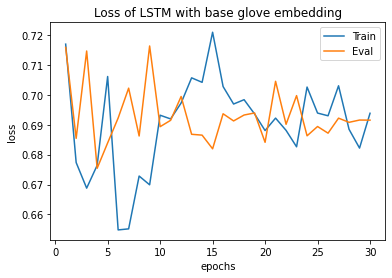

In [ ]:
plt.title('Loss of LSTM with base glove embedding')
plt.plot(epochs, glove_trainloss_log)
plt.plot(epochs, evalloss_log)
plt.legend(['Train', 'Eval'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()


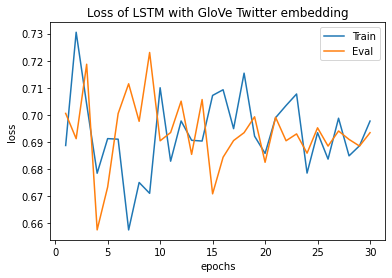

In [ ]:
plt.title('Loss of LSTM with GloVe Twitter embedding')
plt.plot(epochs, Twitter_trainloss)
plt.plot(epochs, Twitter_evalloss_log)
plt.legend(['Train', 'Eval'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()


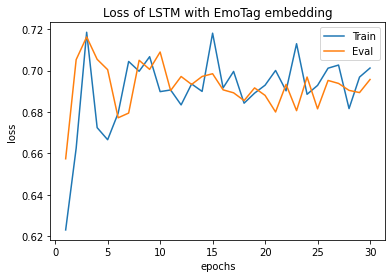

In [ ]:
plt.title('Loss of LSTM with EmoTag embedding')
plt.plot(epochs, Emotag_train_loss)
plt.plot(epochs, Emotag_eval_loss)
plt.legend(['Train', 'Eval'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.close()
